<div style="display: flex; background-color: #3F579F;">
    <h1 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px;" align="center">Consumption needs of buildings - P4</h1>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 5px 30px 0px 30px;" >
    <h3 style="width: 100%; text-align: center; float: left; font-size: 24px;" align="center">| Modeling notebook |</h3>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 10px 30px 30px 30px;">
    <h4 style="width: 100%; text-align: center; float: left; font-size: 24px;" align="center">Data Scientist course - OpenClassrooms</h4>
</div>

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">1. Libraries and functions</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.1. Libraries and functions</h3>
</div>

In [1]:
## df_analysis
import io
import gc
import timeit
import math
from math import prod

## General
import pandas as pd
import numpy as np
from numpy import asarray
from numpy.random import seed, randint
import matplotlib.pyplot as plt
import seaborn as sns

## Scikit Learn library
from sklearn.model_selection import train_test_split, ShuffleSplit, permutation_test_score
from sklearn.impute import KNNImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_validate, KFold, GridSearchCV, validation_curve, learning_curve, cross_val_predict, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor, NearestNeighbors
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.dummy import DummyRegressor

%matplotlib inline

sns.set_theme(style="darkgrid")

SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.2. Functions declaration</h3>
</div>

In [2]:
def df_analysis(df, name_df, *args, **kwargs):
    """
    Method used to analyze on the DataFrame.

    Parameters:
    -----------------
        df : pandas.DataFrame
        Dataset to analyze.
        
        name_df : str
        Dataset name.
        
        *args, **kwargs:
        -----------------
            columns : list
            Dataframe keys in list format.
            
            flag : str
            Flag to show complete information about the dataset to analyse
            "complete" shows all information about the dataset.

    Returns:
    -----------------
        None. 
        Print the analysis on the Dataset. 
        
    """
    
    # Getting the variables
    columns = kwargs.get("columns", None)
    type_analysis = kwargs.get("type_analysis", None)
    
    ORDERING_COMPLETE = [
        "name", "type", "records", "unique", "# NaN", "% NaN", "mean", "min", "25%", "50%", "75%", "max", "std"
    ]
    
    # Calculating the memory usage based on dataframe.info()
    buf = io.StringIO()
    df.info(buf=buf)
    memory_usage = buf.getvalue().split('\n')[-2]
    
    if df.empty:
        print("The", name_df, "dataset is empty. Please verify the file.")
    else:
        empty_cols = [col for col in df.columns if df[col].isna().all()] # identifying empty columns
        df_rows_duplicates = df[df.duplicated()] #identifying full duplicates rows
        
        # Creating a dataset based on Type object and records by columns
        type_cols = df.dtypes.apply(lambda x: x.name).to_dict() 
        df_resume = pd.DataFrame(list(type_cols.items()), columns = ["name", "type"])
        df_resume["records"] = list(df.count())
        df_resume["# NaN"] = list(df.isnull().sum())
        df_resume["% NaN"] = list(((df.isnull().sum() / len(df.index))*100).round(2))
        
        print("\nAnalysis of", name_df, "dataset")
        print("--------------------------------------------------------------------")
        print("- Dataset shape:                 ", df.shape[0], "rows and", df.shape[1], "columns")
        print("- Total of NaN values:           ", df.isna().sum().sum())
        print("- Percentage of NaN:             ", round((df.isna().sum().sum() / prod(df.shape)) * 100, 2), "%")
        print("- Total of full duplicates rows: ", df_rows_duplicates.shape[0])
        print("- Total of empty rows:           ", df.shape[0] - df.dropna(axis="rows", how="all").shape[0]) if df.dropna(axis="rows", how="all").shape[0] < df.shape[0] else \
                    print("- Total of empty rows:            0")
        print("- Total of empty columns:        ", len(empty_cols))
        print("  + The empty column is:         ", empty_cols) if len(empty_cols) == 1 else \
                    print("  + The empty column are:         ", empty_cols) if len(empty_cols) >= 1 else None
        print("- Unique indexes:                ", df.index.is_unique)
        
        if columns is not None:
            print("\n- The key(s):", columns, "is not present multiple times in the dataframe.\n  It CAN be used as a primary key.") if df.size == df.drop_duplicates(columns).size else \
                print("\n- The key(s):", columns, "is present multiple times in the dataframe.\n  It CANNOT be used as a primary key.")
        
        if type_analysis == "summarized":
            print("\n")
        
        if type_analysis is None or type_analysis != "summarized":
            pd.set_option("display.max_rows", None) # show full of showing rows
            pd.set_option("display.max_columns", None) # show full of showing cols
            pd.set_option("display.max_colwidth", None) # show full width of showing cols
            pd.set_option("display.float_format", lambda x: "%.5f" % x) # show full content in cell    
            
            if type_analysis is None or type_analysis != "complete":
                print("\n- Type object and records by columns      (",memory_usage,")")
                print("--------------------------------------------------------------------")
            elif type_analysis == "complete":
                df_resume["unique"] = list(df.nunique())
                df_desc = pd.DataFrame(df.describe().T).reset_index()
                df_desc = df_desc.rename(columns={"index": "name"})
                df_resume = df_resume.merge(right=df_desc[["name", "mean", "min", "25%", "50%", "75%", "max", "std"]], on="name", how="left")
                df_resume = df_resume[ORDERING_COMPLETE]
                print("\n- Type object and records by columns      (",memory_usage,")")
                print("--------------------------------------------------------------------")
                
            display(df_resume.sort_values("records", ascending=False))
            
            pd.reset_option("display.max_rows") # reset max of showing rows
            pd.reset_option("display.max_columns") # reset max of showing cols
            pd.reset_option("display.max_colwidth") # reset width of showing cols
            pd.reset_option("display.float_format") # reset show full content in cell
            
        # deleting dataframe to free memory
        if type_analysis == "complete":
            del [[df_resume, df_desc]]
            gc.collect()
            df_resume, df_desc = (pd.DataFrame() for i in range(2))
        else:
            del df_resume
            gc.collect()
            df_resume = pd.DataFrame()

    
def plot_validation_curve_by(estimator, name_model, validation_by, X_train, y_train, param_name, param_range, param_name_short, scoring=None, cv=None):
    """
    Generate 1 plots: 
        1. The test and training validation curve
    
    Parameters
    -----------------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.
        
    name_model : str
        Name of the model as title for the chart. 
        
    validation_by : str 
        Name of the metric to plot the curve. Possible values ["R2SCORE", "MAE"]
        
    X_train : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y_train : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.      
        
    param_name : str
        Name of the parameter that will be varied.
    
    param_range : array-like of shape (n_values,)
        The values of the parameter that will be evaluated.
    
    param_name_short : str
        Short name for param_name
        
    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.
        
    Returns:
    -----------------
        None. 
        Plot the graph. 
        
    """    
    # Initializing figure
    fig = plt.figure(figsize=(8, 6))
    
    if validation_by == "R2SCORE":
        
        # Get the validation_curves results
        train_scores, test_scores = validation_curve(estimator, X_train, y_train, param_name=param_name, param_range=param_range, cv=kfold)

        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plot = sns.lineplot(x=param_range, y=train_scores_mean, label="Train", marker="o")
        plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")

        plot = sns.lineplot(x=param_range, y=test_scores_mean, label="Validation", marker="o")
        plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="orange")

        plt.legend(bbox_to_anchor=(1.22, 1), borderaxespad=0)
        
        plt.title(name_model + " Validation curve", fontdict={ "fontsize": 16, "fontweight": "normal" })
        plot.set(xlabel=param_name_short, ylabel="R2-score".translate(SUP))
        
    elif validation_by == "MAE":
    
        # Get the validation_curves results
        train_scores, test_scores = validation_curve(estimator, X_train, y_train, param_name=param_name, param_range=param_range, scoring=scoring, cv=kfold)
        
        train_errors, test_errors = -train_scores, -test_scores
        
        plot = plt.errorbar(param_range, train_errors.mean(axis=1), yerr=train_errors.std(axis=1), label="Train")
        plot = plt.errorbar(param_range, test_errors.mean(axis=1), yerr=test_errors.std(axis=1), label="Validation")

        plt.legend(bbox_to_anchor=(1.235, 1), borderaxespad=0)
        
        plt.ylabel("MAE\n(smaller is better)")
        plt.xlabel(param_name_short)
        _ = plt.title(name_model + " Validation curve", fontdict={ "fontsize": 16, "fontweight": "normal" })
     
    plt.tight_layout()
    plt.savefig("img/" + name_model + "-validation-curve-by-" + validation_by + ".png")
    sns.despine(fig)
    plt.show()
    
            
def plot_learning_curve(estimator, name_model, X_train, y_train, cv=None, train_sizes=np.linspace(0.2, 1.0, 10)):
    """
    Generate 3 plots: 
        1. The test and training learning curve
        2. The training samples vs fit times curve
        3. The fit times vs score curve
    
    Parameters
    -----------------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.
        
    name_model : str
        Name of the model as title for the chart.        
        
    X_train : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y_train : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.        
        
    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5) or (0.2, 1.0, 10))
        
    Returns:
    -----------------
        None. 
        Plot the graphs. 
        
    """
    
    # Get the learning_curves results
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X_train, y_train, cv=cv, \
                                                                           train_sizes=train_sizes, n_jobs=-1, return_times=True)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    # Initializing figure
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))
    
    # Plot learning curve
    plot = sns.lineplot(x=train_sizes, y=train_scores_mean, label="Train", marker="o", ax=ax1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")

    plot = sns.lineplot(x=train_sizes, y=test_scores_mean, label="Validation", marker="o", ax=ax1)
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="orange")
    
    ax1.legend(loc="best")
    ax1.set_title(" Learning curve (" + name_model + ")", fontdict={ "fontsize": 16, "fontweight": "normal" })
    plot.set(xlabel="Training examples", ylabel="R2-score".translate(SUP))
    
    # Plot Scalability of the model
    plot = sns.lineplot(x=train_sizes, y=fit_times_mean, marker="o", ax=ax2)
    ax2.fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.1, color="blue")
    
    ax2.set_title("Scalability of the model", fontdict={ "fontsize": 16, "fontweight": "normal" })
    plot.set(xlabel="Training examples", ylabel="Fit times")

    # Performance of the model
    plot = sns.lineplot(x=fit_times_mean, y=test_scores_mean, marker="o", ax=ax3)
    ax3.fill_between(fit_times_mean, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)
    
    ax3.set_title("Performance of the model", fontdict={ "fontsize": 16, "fontweight": "normal" })
    plot.set(xlabel="Fit times examples", ylabel="R2-score".translate(SUP))
    
    plt.savefig("img/" + name_model + "-performance-model.png")
    sns.despine(fig)
    plt.show()


def plot_cross_val_predi(estimator, name_model, target_variable, X_train, y_train, cv=None):
    """
    Generate 1 plots: 
        1. The validation between real values vs predicted values
    
    Parameters
    -----------------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.
        
    name_model : str
        Name of the model as title for the chart.   

    target_variable : str
        Name of the target variable.    
        
    X_train : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y_train : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.      
        
    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.
        
    Returns:
    -----------------
        None. 
        Plot the graph. 
        
    """   
    
    # Get the predicted values
    predicted = cross_val_predict(estimator, X_train, y_train, cv=kfold)
    
    # Initializing figure
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))
    
    # Main title
    plt.suptitle("Real values vs Predicted values", size=24)
    
    ax1.scatter(predicted, y_train, edgecolors=(0, 0, 0))
    ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "--k", lw=4)
    
    ax1.text(min(y_train)+0.2, 0.98*max(y_train), r'$R^2$ = %.2f, RMSE = %.2f' % (
            round(r2_score(y_train, predicted), 3),
            round(math.sqrt(mean_squared_error(y_train, predicted)), 3)), 
            style="italic", fontsize=13,
            bbox={"facecolor": "grey", "alpha": 0.4, "pad": 5})
    ax1.set_title(name_model + " Cross-Values Predictions", fontdict={ "fontsize": 16, "fontweight": "normal" })
    ax1.set_xlabel("Predicted values")
    ax1.set_ylabel("Real values")

    
    ax2.scatter(predicted, (y_train - predicted), edgecolors=(0, 0, 0))
    ax2.hlines(y=0, xmin=predicted.min(), xmax=predicted.max(), colors="red", linestyles="--", lw=4)
    ax2.set_title(name_model + " Residuals", fontdict={ "fontsize": 16, "fontweight": "normal" })
    ax2.set_xlabel("Predicted values")
    ax2.set_ylabel("Standardized residuals")
    
    
    sns.kdeplot(y_train, color="r", label="Real values", ax=ax3)
    sns.kdeplot(predicted, color="b", label="Predicted values", ax=ax3)
    
    ax3.set_title(name_model + " Distribution plot based on density", fontdict={ "fontsize": 16, "fontweight": "normal" })
    ax3.set_xlabel("SiteEnergyUse(kBtu)")
    ax3.set_ylabel("Density")
    plt.legend(bbox_to_anchor=(0.99, 0.99), borderaxespad=0)
    
    plt.savefig("img/" + name_model + "-cross-val-predict.png")
    plt.show()
    

def plot_features_importance(estimator, name_model, X_train, y_train, scoring=None):
    """
    Generate 1 plots: 
        1. The importance by feature
    
    Parameters
    -----------------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.
        
    name_model : str
        Name of the model as title for the chart.     
        
    X_train : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y_train : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning. 
        
    scoring : string, callable or None, default=None
        Scorer to use. It can be a single string or a callable. 
        If None, the estimator’s default scorer is used. 
        
    Returns:
    -----------------
        None. 
        Plot the graph. 
        
    """     
    # Get the importance by feature
    results = permutation_importance(estimator, X_train, y_train, scoring=scoring)
    
    # Making a dataframe to work easily
    df_importance = pd.DataFrame({
                        "Feature" : X_train.columns,
                        "Importance" : results.importances_mean
                    })
    
    # Sorting by importance before plotting
    df_importance = df_importance.sort_values("Importance")
    
    # Initializing figure    
    fig = plt.subplots(figsize=(10, 8))
    
    plot = sns.barplot(data=df_importance, y=df_importance["Feature"], x=df_importance["Importance"])
    
    plt.title(name_model + " Features Importance", fontdict={ "fontsize": 16, "fontweight": "normal" })
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.savefig("img/" + name_model + "-feature-importance.png")
    plt.show()

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">2. Importing files</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">2.1. Importing and preparing files</h3>
</div>

<div class="alert alert-block alert-info">
    <p>It is necessary to remember that the following dataset doesn't have any transformation/preprocessing of data.</p>
    <p>So, we have to do the following:</p>
    <ul style="list-style-type: square;">
        <li>Transform features and target to Normal distribution</li>
        <li>Treat missing values</li>
        <li>Standarization of data</li>
    </ul>  
</div>

In [3]:
data = pd.read_csv(r"datasets\df_to_work.csv")

In [4]:
data.head()

,NumberofFloors,NumberofBuildings,BuildingAge,PropertyGFATotal,PropertyGFATotal-binned,Neighborhood,renamed_PropertyType,Electricity_ratio,NaturalGas,SteamUse,OtherFuelUse,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),ENERGYSTARScore
0,12.0,1.0,94.0,88434.0,Medium,DOWNTOWN,Hotel,52.79951,True,True,False,6981428.0,249.43,65.0
1,11.0,1.0,25.0,103566.0,Medium,DOWNTOWN,Hotel,46.74768,True,False,False,8354235.0,263.51,51.0
2,10.0,1.0,95.0,61320.0,Medium,DOWNTOWN,Hotel,9.80903,True,True,False,28229320.0,1936.34,1.0
3,18.0,1.0,41.0,175580.0,Medium,DOWNTOWN,Hotel,40.90771,True,False,False,14829099.0,507.70,67.0
4,11.0,1.0,95.0,83008.0,Medium,DOWNTOWN,Hotel,42.85568,True,False,False,6252842.0,208.46,25.0


In [5]:
df_analysis(data, "data", type_analysis="complete")


Analysis of data dataset
--------------------------------------------------------------------
- Dataset shape:                  1614 rows and 14 columns
- Total of NaN values:            572
- Percentage of NaN:              2.53 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 143.6+ KB )
--------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
2,BuildingAge,float64,1614,113,0,0.00000,59.44796,6.00000,32.00000,56.00000,91.00000,121.00000,32.75537
4,PropertyGFATotal-binned,object,1614,3,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Neighborhood,object,1614,13,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,renamed_PropertyType,object,1614,8,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaturalGas,bool,1614,2,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,SteamUse,bool,1614,2,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,OtherFuelUse,bool,1614,2,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,SiteEnergyUse(kBtu),float64,1614,1613,0,0.00000,6301646.01963,11441.00000,1188142.75000,2397995.50000,6499306.00000,295812640.00000,13693695.87053
12,GHGEmissions(MetricTonsCO2e),float64,1614,1541,0,0.00000,134.64926,0.08000,19.08000,47.22000,131.02750,10780.64000,422.52765
1,NumberofBuildings,float64,1610,5,4,0.25000,1.01118,1.00000,1.00000,1.00000,1.00000,11.00000,0.28403


<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">3. Splitting data - SiteEnergyUse(kBtu)</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.1. Splitting dataset based on the features and targets</h3>
</div>

<div class="alert alert-block alert-info">
    Splitting dataset based on the features and targets
</div>

In [6]:
X = data.drop(columns=["SiteEnergyUse(kBtu)", "GHGEmissions(MetricTonsCO2e)", "ENERGYSTARScore"])

In [7]:
X.head()

,NumberofFloors,NumberofBuildings,BuildingAge,PropertyGFATotal,PropertyGFATotal-binned,Neighborhood,renamed_PropertyType,Electricity_ratio,NaturalGas,SteamUse,OtherFuelUse
0,12.0,1.0,94.0,88434.0,Medium,DOWNTOWN,Hotel,52.79951,True,True,False
1,11.0,1.0,25.0,103566.0,Medium,DOWNTOWN,Hotel,46.74768,True,False,False
2,10.0,1.0,95.0,61320.0,Medium,DOWNTOWN,Hotel,9.80903,True,True,False
3,18.0,1.0,41.0,175580.0,Medium,DOWNTOWN,Hotel,40.90771,True,False,False
4,11.0,1.0,95.0,83008.0,Medium,DOWNTOWN,Hotel,42.85568,True,False,False


<div class="alert alert-block alert-info">
    Based on the Exploratory Data Analysis realized, we are going to transform to log2 the target variable
</div>

In [8]:
y_energy = np.log2(data.loc[:,"SiteEnergyUse(kBtu)"])
y_energy.head()

0    22.735091
1    22.994076
2    24.750691
3    23.821928
4    22.576081
Name: SiteEnergyUse(kBtu), dtype: float64

In [9]:
y_energy_values = y_energy.values
y_energy_values[:5]

array([22.73509073, 22.9940763 , 24.75069104, 23.82192761, 22.57608063])

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.2. Train/Test split</h3>
</div>

<div class="alert alert-block alert-info">
    At this point, we are going to predict <b>SiteEnergyUse(kBtu)</b>
</div>

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y_energy, test_size=0.33, random_state=42)

In [11]:
print("X_train: {}".format(X_train.shape))
print("y_train: {}".format(y_train.shape))
print("---------------------")
print("X_test: {}".format(X_test.shape))
print("y_test: {}".format(y_test.shape))

X_train: (1081, 11)
y_train: (1081,)
---------------------
X_test: (533, 11)
y_test: (533,)


<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">4. Data preprocessing</h2>
</div>

<div class="alert alert-block alert-info">
     We are going to process the features as follows<br><br>
    <p><b>Boolean features</b><br>
    Transforming them into int</p>
    <p><b>Categorical features</b><br>
    Transforming all features through LabelEncoder</p>
    <p><b>Ordinal features</b><br>
    Transforming the feature through OrdinalEncoder</p>
    <p><b>Features to Log</b><br>
    Based on the Exploratory Data Analysis, we detected the features that can be transformed into log2 to achieve a better normal distribution </p>
    <p><b>Numerical features</b><br>
    Normalizing the features through StandardScaler due to all of them do not have a normal distribution</p>
</div>

In [12]:
def boolean_transformation(X):
    # Transforming the boolean features into int
    return X.astype(int)

def log_transformation(X):
    # transforming some features into log2
    return np.log2(X + 1)

In [13]:
BOOLEAN_FEATURES = ["NaturalGas", "SteamUse", "OtherFuelUse"] # Features to be transformed into int
CATEGORICAL_FEATURES = ["Neighborhood", "renamed_PropertyType"] # Features to be transformed with OneHotEncoder()
ORDINAL_FEATURES = ["PropertyGFATotal-binned"]
FEATURES_TO_LOG = ["PropertyGFATotal"] # Features to be transformed into log2
NUMERICAL_FEATURES = ["NumberofFloors", "NumberofBuildings", "BuildingAge", "PropertyGFATotal", "Electricity_ratio"] # Features to be treated considering numerical values

In [14]:
boolean_pipeline = make_pipeline(FunctionTransformer(boolean_transformation))

categorical_pipeline = make_pipeline(OneHotEncoder(sparse=False, drop="first"))

ordinal_pipeline = make_pipeline(OrdinalEncoder(categories=[["Small", "Medium", "Large"]]))

log_transformation_pipeline = make_pipeline(KNNImputer(), FunctionTransformer(log_transformation))

numerical_pipeline = make_pipeline(KNNImputer(), StandardScaler())

In [15]:
preprocessor = make_column_transformer(
                (boolean_pipeline, BOOLEAN_FEATURES), 
                (categorical_pipeline, CATEGORICAL_FEATURES),
                (ordinal_pipeline, ORDINAL_FEATURES),
                (log_transformation_pipeline, FEATURES_TO_LOG), 
                (numerical_pipeline, NUMERICAL_FEATURES)
)

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">5. Modelisation</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">5.1. Supervised models</h3>
</div>

<div class="alert alert-block alert-info">
    List of models to use. for now, in default mode
</div>

In [16]:
regressors = {
    "Linear" : LinearRegression(),
    "KNeighbors" : KNeighborsRegressor(n_neighbors=2),
    "Lasso" : Lasso(),
    "SVR" : SVR(),
    "Random Forest" : RandomForestRegressor(),
    "Gradient Boosting" : GradientBoostingRegressor()
}

<div class="alert alert-block alert-info">
    Models metrics
</div>

In [17]:
# Dataframe with y_test_transformed to compared againts predictions
df_y_pred = pd.DataFrame({
        "Model" : "Original",
        "y_pred" : y_test
})

# List of metrics results for each models 
LIST_MODEL, LIST_R2SCORE, LIST_MAE, LIST_RMSE, LIST_DURATION  = ([] for i in range(5))

for k, v in regressors.items():
    
    start_time_model = timeit.default_timer()
    
    # Data preprocessing based on the pipelines and the regressors setup
    reg = make_pipeline(preprocessor, v)
    
    # Fit the model using the training data and training target
    reg.fit(X_train, y_train)
    
    # Making the prediction using the testing data
    y_pred = reg.predict(X_test)
    
    end_time_model =  round(timeit.default_timer() - start_time_model, 3)
    
    # Concatenating predictions to compare against y_test_transformed
    df_temp = pd.DataFrame({
        "Model" : k,
        "y_pred" : y_pred
    })
    
    # Concatenating predictions to compare against y_test_transformed
    df_y_pred = pd.concat([df_y_pred, df_temp])
    
    # Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
    R2SCORE = round(1 - r2_score(y_test, y_pred), 3)
    
    # Calculating the Mean absolute error (The best value is 0.0)
    MAE = round(mean_absolute_error(y_test, y_pred), 3)
    
    # Calculating Root Mean Square Error for each model (The best value is 0.0)
    RMSE = round(mean_squared_error(y_test, y_pred, squared=False), 3)
    
    # Adding results into LIST
    LIST_MODEL.append(k)
    LIST_R2SCORE.append(R2SCORE)
    LIST_MAE.append(MAE)
    LIST_RMSE.append(RMSE)
    LIST_DURATION.append(end_time_model)

<div class="alert alert-block alert-info">
    Comparison of energy predictions against original data
</div>

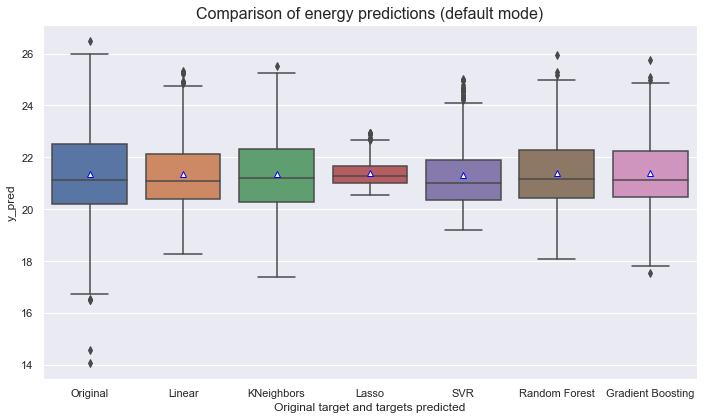

In [18]:
plt.figure(figsize=[10,6])
sns.boxplot(x=df_y_pred["Model"], y=df_y_pred["y_pred"], showmeans=True, 
            meanprops={"markerfacecolor":"white", "markeredgecolor":"blue"})
plt.title("Comparison of energy predictions (default mode)", size=16)
plt.xlabel("Original target and targets predicted", size=12)
plt.tight_layout()
plt.savefig("img/Comparison-of-imputations.png")
plt.show()

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    
    <p>At this point, we can see that <b>Kneighbors</b>, <b>Random Forest</b> and <b>Gradient Boosting</b> are the most <b>similar to Original data</b></p>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">5.2. Predictions metrics</h3>
</div>

<div class="alert alert-block alert-info">
    Creating dataframe based on metrics results for each models
</div>

In [19]:
df_models_metrics = pd.DataFrame({
    "Model" : LIST_MODEL,
    "1 - " + "R2".translate(SUP) : LIST_R2SCORE, 
    "MAE" : LIST_MAE,    
    "RMSE" : LIST_RMSE,
    "Duration" : LIST_DURATION,
})

df_models_metrics

,Model,1 - R²,MAE,RMSE,Duration
0,Linear,0.341,0.797,1.074,0.046
1,KNeighbors,0.513,0.981,1.316,0.061
2,Lasso,0.680,1.156,1.515,0.034
3,SVR,0.393,0.837,1.151,0.126
4,Random Forest,0.325,0.773,1.048,0.563
5,Gradient Boosting,0.323,0.787,1.044,0.210


<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    
    <b>Best results</b> with default mode considering each model
    <ul style="list-style-type: square;">
        <li><b>1-R2:</b> Gradient Boosting(0.323) </li>
        <li><b>MAE:</b> Gradient Boosting(0.787) </li>
        <li><b>RMSE:</b> Gradient Boosting(1.044) </li>
        <li><b>Duration:</b> Lasso(0.076) </li>
    </ul>
</div>

In [20]:
df_models_metrics_melt = pd.melt(df_models_metrics, id_vars="Model", var_name="Metric", value_name="Value")
df_models_metrics_melt.head(3)

,Model,Metric,Value
0,Linear,1 - R²,0.341
1,KNeighbors,1 - R²,0.513
2,Lasso,1 - R²,0.680


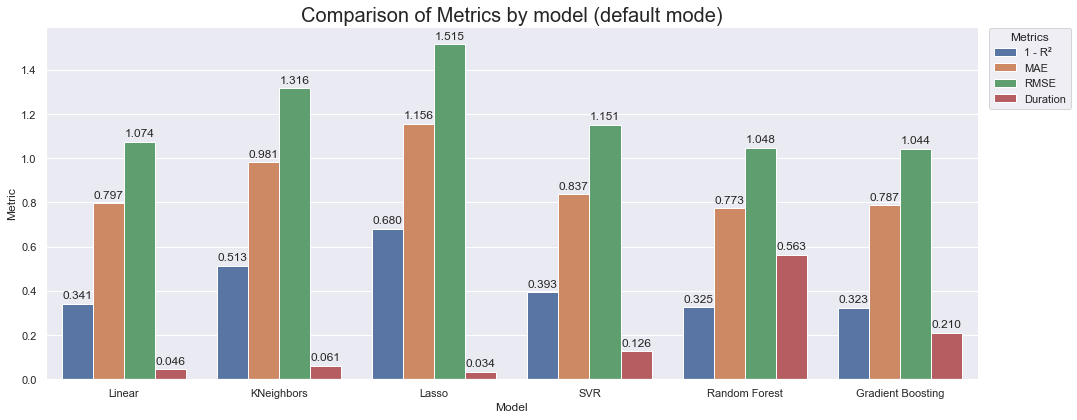

In [21]:
fig, ax1 = plt.subplots(figsize=(15, 6))
plot = sns.barplot(x="Model", y="Value", hue="Metric", data=df_models_metrics_melt, ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".3f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 8), textcoords="offset points")
plt.title("Comparison of Metrics by model (default mode)", size=20)
plt.legend(bbox_to_anchor=(1.10, 1), borderaxespad=0, title="Metrics")
plt.tight_layout()
plt.xlabel("Model", size=12)
plt.ylabel("Metric", size=12)
plt.savefig("img/comparisonMetricsByModel.png")
sns.despine(fig)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    
    So far, <b>Gradient Boosting</b> is giving the best result with <b>default parameters</b>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">5.3. Cross Validation K-Fold</h3>
</div>

In [22]:
# List of metrics results for each models 
LIST_MODEL, LIST_R2SCORE, LIST_MAE, LIST_RMSE, LIST_DURATION, LIST_SCORES  = ([] for i in range(6))

for k, v in regressors.items():

    # Data preprocessing based on the pipelines and the regressors setup
    reg = make_pipeline(preprocessor, v)
    
    kfold = KFold(n_splits=5, shuffle=False, random_state=None)
    
    # Get the score for each validation score method to get accuracy of model
    scores = cross_validate(reg, X_train, y_train, cv=kfold, scoring=("r2", "neg_mean_absolute_error", "neg_mean_squared_error"), return_train_score=True)
    
    # Adding results into LIST
    LIST_MODEL.append(k)
    LIST_R2SCORE.append(round((1 - scores.get("test_r2").mean()), 3))
    LIST_MAE.append(round(abs(scores.get("test_neg_mean_absolute_error").mean()), 3))
    LIST_RMSE.append(round(math.sqrt((abs(scores.get("test_neg_mean_squared_error").mean()))), 3))
    LIST_DURATION.append(round(scores.get("fit_time").mean(), 3))
    LIST_SCORES.append(scores.get("test_r2"))

<div class="alert alert-block alert-info">
    Plotting the cross validation executions
</div>

In [23]:
df_cross_val = pd.DataFrame(LIST_SCORES, columns=[1, 2, 3, 4, 5])
df_cross_val["Model"] = LIST_MODEL
df_cross_val_melt = df_cross_val.melt(id_vars="Model", var_name="Execution", value_name="Score")

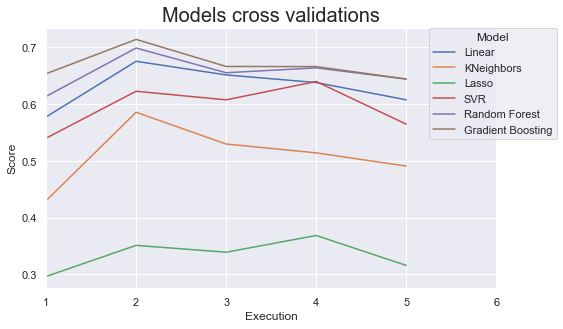

In [24]:
plt.figure(figsize=(8, 6))
plot = sns.lineplot(x="Execution",
                    y="Score",
                    hue="Model",
                    data=df_cross_val_melt
)
plt.legend(bbox_to_anchor=(0.85, 1), borderaxespad=0, title="Model")
plt.tight_layout()
plt.title("Models cross validations", size=20)
plot.set(xlabel="Execution", ylabel="Score", xlim=(1, 6))

plt.savefig("img/models-cross-validations-Scores.png")
sns.despine(fig)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    
    At this point, we can see
    <ul style="list-style-type: square;">
        <li><b>Gradient Boosting</b> is the best result </li>
        <li><b>Lasso</b> is the worst result </li>
    </ul>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">5.3.1 Predictions metrics</h4>
</div>

<div class="alert alert-block alert-info">
    Creating dataframe based on metrics results for each models
</div>

In [25]:
df_models_metrics_cross = pd.DataFrame({
    "Model" : LIST_MODEL,
    "1 - "+"R2".translate(SUP) : LIST_R2SCORE, 
    "MAE" : LIST_MAE,    
    "RMSE" : LIST_RMSE,
    "Duration" : LIST_DURATION,
})

df_models_metrics_cross

,Model,1 - R²,MAE,RMSE,Duration
0,Linear,0.370,0.821,1.100,0.019
1,KNeighbors,0.490,0.944,1.266,0.027
2,Lasso,0.666,1.141,1.474,0.016
3,SVR,0.405,0.843,1.152,0.063
4,Random Forest,0.345,0.804,1.062,0.458
5,Gradient Boosting,0.331,0.794,1.039,0.196


<div class="alert alert-block alert-success">
    <b>Best results</b> with Cross-Validation considering each model
    <ul style="list-style-type: square;">
        <li><b>1-R2:</b> Gradient Boosting(0.330) </li>
        <li><b>MAE:</b> Gradient Boosting(0.794) </li>
        <li><b>RMSE:</b> Gradient Boosting(1.037) </li>
        <li><b>Duration:</b> Linear(0.040) </li>
    </ul> 
</div>

In [26]:
df_models_metrics_melt_cross = pd.melt(df_models_metrics_cross, id_vars="Model", var_name="Metric", value_name="Value")
df_models_metrics_melt_cross.head()

,Model,Metric,Value
0,Linear,1 - R²,0.370
1,KNeighbors,1 - R²,0.490
2,Lasso,1 - R²,0.666
3,SVR,1 - R²,0.405
4,Random Forest,1 - R²,0.345


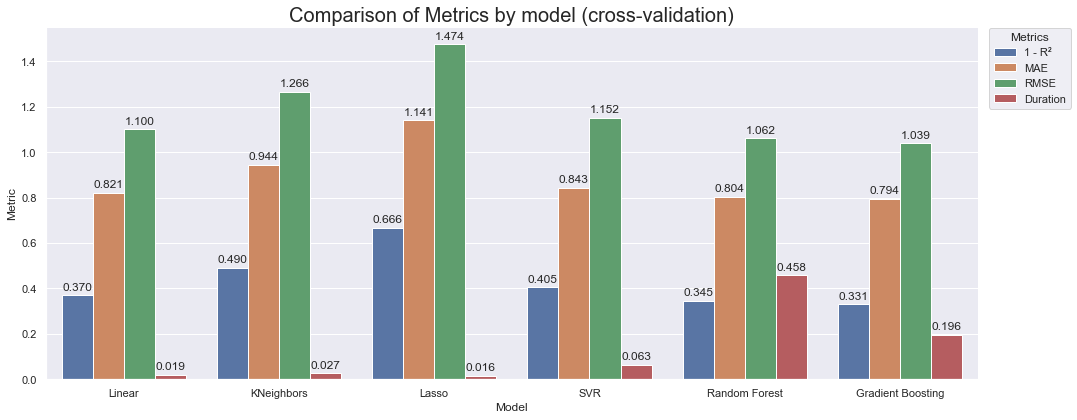

In [27]:
fig, ax1 = plt.subplots(figsize=(15, 6))
plot = sns.barplot(x="Model", y="Value", hue="Metric", data=df_models_metrics_melt_cross, ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".3f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 8), textcoords="offset points")
plt.title("Comparison of Metrics by model (cross-validation)", size=20)
plt.legend(bbox_to_anchor=(1.10, 1), borderaxespad=0, title="Metrics")
plt.tight_layout()
plt.xlabel("Model", size=12)
plt.ylabel("Metric", size=12)
plt.savefig("img/comparisonMetrics_crossByModel.png")
sns.despine(fig)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: square;">
        <li>Some results improved their values</li>
        <li>Despite the decrease of his result, <b>Gradient Boosting</b> is still giving the best result with <b>default parameters</b> and <b>cross-validation</b></li>
    </ul>
</div>

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">6. Optimization</h2>
</div>

<div class="alert alert-block alert-info">
    We are going to optimize each model separately, to see the results more in detail<br><br>
    
    Also, we are going to add all predictions and metrics base on parameters optimization to compare the results
</div>

In [28]:
# Dataframe for metrics to compare
df_models_metrics_gsc = pd.DataFrame({})

# Dataframe with final results for each models withs theirs best parameters
df_models_hyperparameters = pd.DataFrame({})

# Dataframe with y_test_transformed to compared againts predictions
df_y_pred_hyperparameters = pd.DataFrame({
        "Model" : "Original",
        "y_pred" : y_test
})

# List of metrics results for each models 
LIST_MODEL_GSC, LIST_R2SCORE_GSC, LIST_MAE_GSC, LIST_RMSE_GSC, LIST_DURATION_GSC, LIST_SCORES_GSC  = ([] for i in range(6))

<div class="alert alert-block alert-info">
    At the same time, we are going to get the following metrics
</div>

In [29]:
SCORINGS = {
    "R2" : "r2",
    "MSE" : "neg_mean_squared_error", 
    "MAE" : "neg_mean_absolute_error"
}

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.1. Linear Regression optimization</h3>
</div>

<div class="alert alert-block alert-info">
    <p>It is necessary to take in account that we are treating with <b>Non-linear Dataset</b> based on EDA done</p>
    
    <p>Initializing model</p>
</div>

In [30]:
lr = LinearRegression()

<div class="alert alert-block alert-info">
    Data preprocessing based on the pipelines and the regressors setup
</div>

In [31]:
reg = make_pipeline(preprocessor, lr)

<div class="alert alert-block alert-info">
    Identifying the names of each parameter
</div>

In [32]:
sorted(reg.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__functiontransformer',
 'columntransformer__pipeline-1__functiontransformer__accept_sparse',
 'columntransformer__pipeline-1__functiontransformer__check_inverse',
 'columntransformer__pipeline-1__functiontransformer__func',
 'columntransformer__pipeline-1__functiontransformer__inv_kw_args',
 'columntransformer__pipeline-1__functiontransformer__inverse_func',
 'columntransformer__pipeline-1__functiontransformer__kw_args',
 'columntransformer__pipeline-1__functiontransformer__validate',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__onehotencoder',
 'columntransformer__pipeline-2__onehotencoder__categories',
 'columntransformer__pipeline-2__onehotencoder__drop',
 'columntransformer__pipe

<div class="alert alert-block alert-info">
    Parameters settings 
</div>

In [33]:
param_grid = {
    "linearregression__copy_X" : [True, False], # If True, X will be copied; else, it may be overwritten.
    "linearregression__fit_intercept" : [True, False] # Whether to calculate the intercept for this model. 
}

<div class="alert alert-block alert-info">
    Executing the model
</div>

In [34]:
# K-Folds cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

search = GridSearchCV(reg, param_grid, n_jobs=-2, cv=kfold, scoring=SCORINGS, refit="R2", return_train_score=True)

search.fit(X_train, y_train)

# Transforming the result to dataframe format
df_results = pd.DataFrame(search.cv_results_)

# Get the results
print("Metrics based on the best R2".translate(SUP))
print("- 1 - " + "R2:".translate(SUP), round((1 - search.best_score_), 3))
print("- MAE:", round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3))
print("- RMSE:", round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3))
print("- Duration:", round(df_results.iloc[search.best_index_]["mean_score_time"], 3))
print("- Parameters:", search.best_params_)

Metrics based on the best R²
- 1 - R²: 0.381
- MAE: 0.825
- RMSE: 1.108
- Duration: 0.021
- Parameters: {'linearregression__copy_X': True, 'linearregression__fit_intercept': True}


<div class="alert alert-block alert-info">
    Adding metrics to compare at the end
</div>

In [35]:
df_temp = pd.DataFrame({
    "Model" : ["LinearRegression"],
    "1 - " + "R2".translate(SUP) : round((1 - search.best_score_), 3), 
    "MAE" : round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3),    
    "RMSE" : round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3),
    "Duration" : round(df_results.iloc[search.best_index_]["mean_score_time"], 3)
})

In [36]:
# Concatenating metrics to compare against model with default parameters
df_models_metrics_gsc = pd.concat([df_models_metrics_gsc, df_temp])

In [37]:
df_models_metrics_gsc

,Model,1 - R²,MAE,RMSE,Duration
0,LinearRegression,0.381,0.825,1.108,0.021


<div class="alert alert-block alert-success">
    We got the <b>best parameters</b> so, we are going to <b>analyze</b> them more in details 
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.1.1. Linear Regression Learning curve</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Learning curve</b>, we are going to use the <b>best  parameters</b> to analyze the model
</div>

In [38]:
kfold = KFold(n_splits=5, shuffle=False, random_state=None)

reg = make_pipeline(preprocessor, LinearRegression(copy_X=search.best_params_.get("linearregression__copy_X"), 
                                                   fit_intercept=search.best_params_.get("linearregression__fit_intercept")
                                                  )
                   )

<div class="alert alert-block alert-info">
    Plotting <b>the learning curve</b> based on the best parameters
</div>

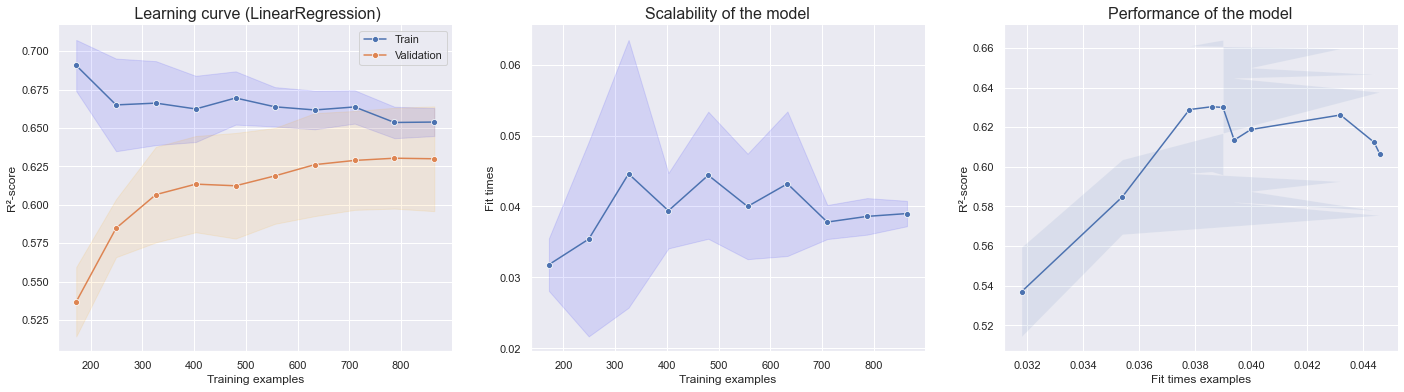

In [39]:
plot_learning_curve(reg, "LinearRegression", X_train, y_train, cv=kfold)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: square;">
        <li>We can see as the training example increase, the R2 improves.</li>
    </ul>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.1.2. Linear Regression predictions validations</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>predictions validations</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> and <b>predicting</b> values</b>
</div>

In [40]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

reg = make_pipeline(preprocessor, LinearRegression(copy_X=search.best_params_.get("linearregression__copy_X"), 
                                                   fit_intercept=search.best_params_.get("linearregression__fit_intercept")
                                                  )
                   )

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

<div class="alert alert-block alert-info">
    Plotting <b>the Cross-Validated Predictions</b> based on the best parameters for <b>training data</b>
</div>

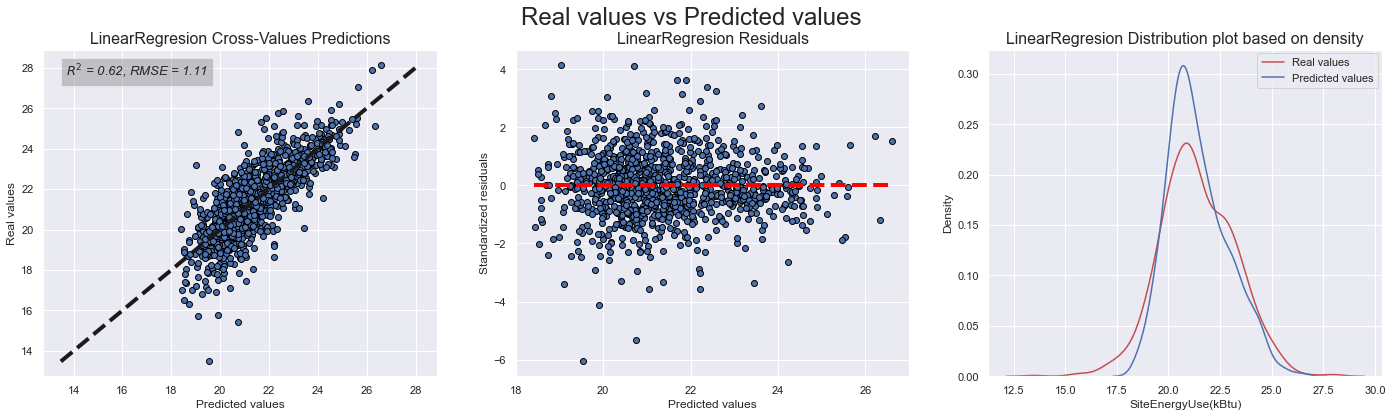

In [41]:
# Making the prediction using the testing data
plot_cross_val_predi(reg, "LinearRegresion", "SiteEnergyUse(kBtu)", X_train, y_train, cv=kfold)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: square;">
        <li>In the Cross-Values Predictions we can compare in details the real values vs predicted values. <br>In this one, it is easy to see some correlation between the model's predictions and its actual results.</li>
        <li>On Residuals, we get positive values (on the y-axis) that mean the prediction was too low, and negative values mean the prediction was too high; 0 means the guess was exactly correct.</li>
    </ul>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.1.3. Linear Regression Features Importance</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Features Importance</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> values</b>
</div>

In [42]:
reg = make_pipeline(preprocessor, LinearRegression(copy_X=search.best_params_.get("linearregression__copy_X"), 
                                                   fit_intercept=search.best_params_.get("linearregression__fit_intercept")
                                                  )
                   )

reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<function boolean_transformation at 0x0000020959AA2D30>))]),
                                                  ['NaturalGas', 'SteamUse',
                                                   'OtherFuelUse']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Neighborhoo...
                                                                  ('functiontransformer',
          

<div class="alert alert-block alert-info">
    Plotting <b>the Features Importance</b> based on the best parameters
</div>

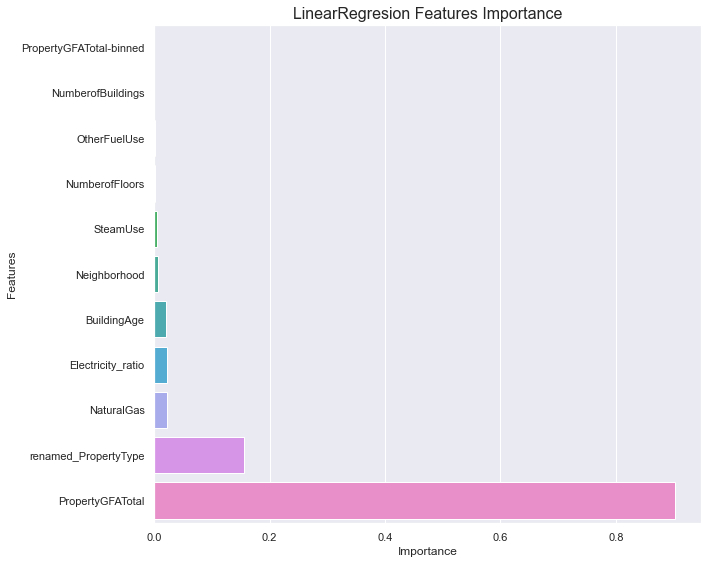

In [43]:
plot_features_importance(reg, "LinearRegresion", X_train, y_train, scoring="r2")

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.1.4. Polynomial Features</h4>
</div>

<div class="alert alert-block alert-info">
    <p>we are going to work with a <b>Polynomial Features</b> to make a model more complex</p>
    
    <p>Initializing model</p>
</div>

In [44]:
poly = PolynomialFeatures()

lr = LinearRegression()

<div class="alert alert-block alert-info">
    Data preprocessing based on the pipelines and the regressors setup
</div>

In [45]:
poly_reg = make_pipeline(preprocessor, poly, lr)

<div class="alert alert-block alert-info">
    Identifying the names of each parameter
</div>

In [46]:
sorted(poly_reg.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__functiontransformer',
 'columntransformer__pipeline-1__functiontransformer__accept_sparse',
 'columntransformer__pipeline-1__functiontransformer__check_inverse',
 'columntransformer__pipeline-1__functiontransformer__func',
 'columntransformer__pipeline-1__functiontransformer__inv_kw_args',
 'columntransformer__pipeline-1__functiontransformer__inverse_func',
 'columntransformer__pipeline-1__functiontransformer__kw_args',
 'columntransformer__pipeline-1__functiontransformer__validate',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__onehotencoder',
 'columntransformer__pipeline-2__onehotencoder__categories',
 'columntransformer__pipeline-2__onehotencoder__drop',
 'columntransformer__pipe

<div class="alert alert-block alert-info">
    Parameters settings 
</div>

In [47]:
param_grid = {
    "polynomialfeatures__degree" : [1, 2, 3, 4],
    "linearregression__copy_X" : [True, False],
    "linearregression__fit_intercept" : [True, False]
}

<div class="alert alert-block alert-info">
    Executing the model
</div>

In [48]:
# K-Folds cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

search = GridSearchCV(poly_reg, param_grid, n_jobs=-2, cv=kfold, scoring=SCORINGS, refit="R2", return_train_score=True)

search.fit(X_train, y_train)

# Transforming the result to dataframe format
df_results = pd.DataFrame(search.cv_results_)

# Get the results
print("Metrics based on the best R2".translate(SUP))
print("- 1 - " + "R2:".translate(SUP), round((1 - search.best_score_), 3)) 
print("- MAE:", round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3))
print("- RMSE:", round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3))
print("- Duration:", round(df_results.iloc[search.best_index_]["mean_score_time"], 3))
print("- Parameters:", search.best_params_)

Metrics based on the best R²
- 1 - R²: 0.381
- MAE: 0.825
- RMSE: 1.108
- Duration: 0.02
- Parameters: {'linearregression__copy_X': True, 'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 1}


<div class="alert alert-block alert-info">
    We got the <b>best parameters</b> so, we are going to <b>analyze</b> them more in details 
</div>

<div style="background-color: #6D83C5;" >
    <h5 style="margin: auto; padding: 20px; color:#fff; ">6.1.4.1. Linear Regression and Polynomial Features Validation curve</h5>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Validation curve</b>, we are going to use a <b>range of neighbors</b> to analyze the model through them
</div>

In [49]:
kfold = KFold(n_splits=5, shuffle=False, random_state=None)

degree = [1, 2, 3, 4, 5]

reg = make_pipeline(preprocessor, PolynomialFeatures(), 
                    LinearRegression(fit_intercept=search.best_params_.get("linearregression__fit_intercept"), copy_X=search.best_params_.get("linearregression__copy_X"))
                   )

<div class="alert alert-block alert-info">
    Plotting <b>the validacion curve</b> based on the best parameters
</div>

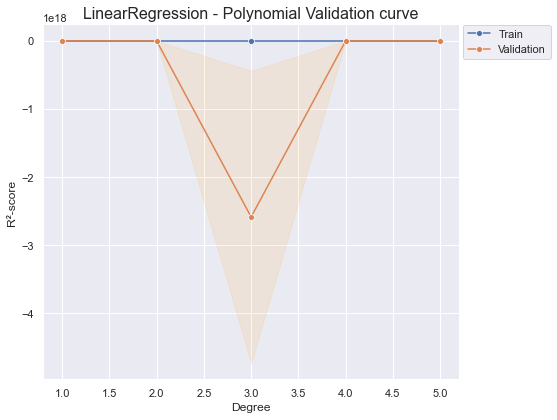

In [50]:
plot_validation_curve_by(reg, "LinearRegression - Polynomial", "R2SCORE", X_train, y_train, param_name="polynomialfeatures__degree", param_range=degree, param_name_short="Degree", cv=kfold)

<div class="alert alert-block alert-warning">
    It is necessary to remenber that we are treating with Non-linear Dataset. 
</div>

<div style="background-color: #6D83C5;" >
    <h5 style="margin: auto; padding: 20px; color:#fff; ">6.1.4.2. Linear Regression and Polynomial Features Learning curve</h5>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Learning curve</b>, we are going to use the <b>best  parameters</b> to analyze the model
</div>

In [51]:
kfold = KFold(n_splits=5, shuffle=False, random_state=None)

reg = make_pipeline(preprocessor, PolynomialFeatures(degree=search.best_params_.get("linearregression__copy_X")), 
                    LinearRegression(fit_intercept=search.best_params_.get("linearregression__fit_intercept"),
                                     copy_X=search.best_params_.get("linearregression__copy_X"))
                   )

<div class="alert alert-block alert-info">
    Plotting <b>the learning curve</b> based on the best parameters
</div>

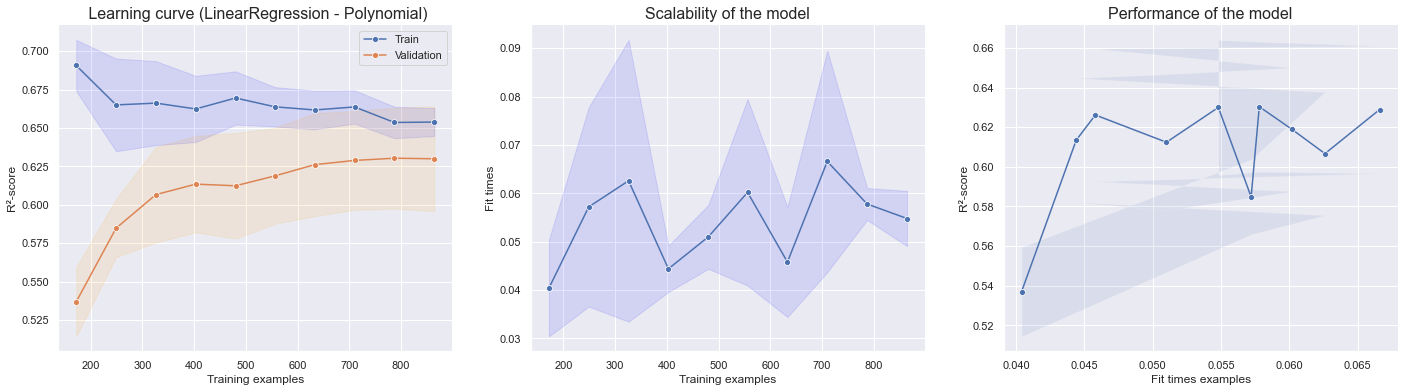

In [52]:
plot_learning_curve(reg, "LinearRegression - Polynomial", X_train, y_train, cv=kfold)

<div style="background-color: #6D83C5;" >
    <h5 style="margin: auto; padding: 20px; color:#fff; ">6.1.4.3. Linear Regression and Polynomial Features predictions validations</h5>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>predictions validations</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> and <b>predicting</b> values</b>
</div>

In [53]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

reg = make_pipeline(preprocessor, PolynomialFeatures(degree=search.best_params_.get("linearregression__copy_X")), 
                    LinearRegression(fit_intercept=search.best_params_.get("linearregression__fit_intercept"),
                                     copy_X=search.best_params_.get("linearregression__copy_X"))
                   )

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

<div class="alert alert-block alert-info">
    Plotting <b>the Cross-Validated Predictions</b> based on the best parameters for <b>training data</b>
</div>

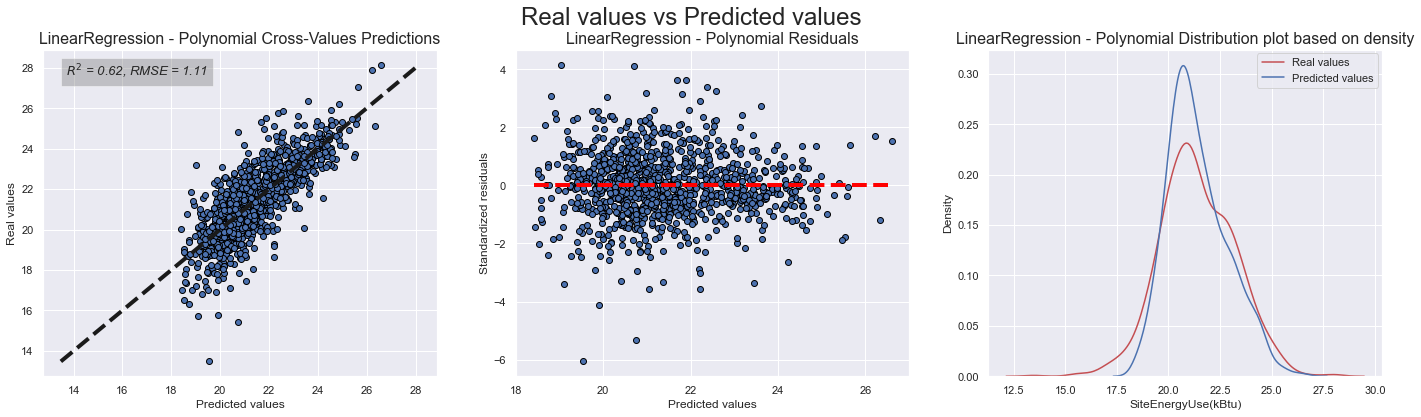

In [54]:
# Making the prediction using the testing data
plot_cross_val_predi(reg, "LinearRegression - Polynomial", "SiteEnergyUse(kBtu)", X_train, y_train, cv=kfold)

<div style="background-color: #6D83C5;" >
    <h5 style="margin: auto; padding: 20px; color:#fff; ">6.1.4.4. Linear Regression and Polynomial Features Features Importance</h5>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Features Importance</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> values</b>
</div>

In [55]:
reg = make_pipeline(preprocessor, PolynomialFeatures(degree=search.best_params_.get("linearregression__copy_X")), 
                    LinearRegression(fit_intercept=search.best_params_.get("linearregression__fit_intercept"),
                                     copy_X=search.best_params_.get("linearregression__copy_X"))
                   )

reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<function boolean_transformation at 0x0000020959AA2D30>))]),
                                                  ['NaturalGas', 'SteamUse',
                                                   'OtherFuelUse']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Neighborhoo...
                                                                   FunctionTransformer(func=<functio

<div class="alert alert-block alert-info">
    Plotting <b>the Features Importance</b> based on the best parameters
</div>

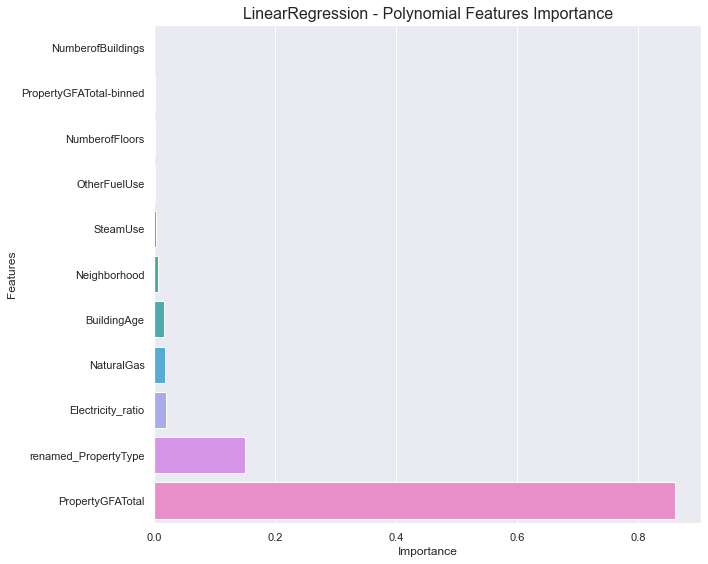

In [56]:
plot_features_importance(reg, "LinearRegression - Polynomial", X_train, y_train, scoring="r2")

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.1.5 Predictions metrics</h4>
</div>

<div class="alert alert-block alert-info">
    <p>To make the comparison among predictions metrics, we are going to select the Linear Regresion without the transformation through Polynomial Features.</p>
    
    <p>At the same time, we are going to make the prediction with the testing set to compare the result with the model in default mode</p>
</div>

In [57]:
start_time_model = timeit.default_timer()

reg = make_pipeline(preprocessor, LinearRegression(fit_intercept=search.best_params_.get("linearregression__fit_intercept"),
                                                   copy_X=search.best_params_.get("linearregression__copy_X"))
                   )

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

# Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
R2SCORE = round((1 - r2_score(y_test, y_pred)), 5)
    
# Calculating the Mean absolute error (The best value is 0.0)
MAE = round(mean_absolute_error(y_test, y_pred), 3)
    
# Calculating Root Mean Square Error for each model (The best value is 0.0)
RMSE = round(mean_squared_error(y_test, y_pred, squared=False), 3)

<div class="alert alert-block alert-info">
    Adding the prediction to compare at the end
</div>

In [58]:
# Concatenating predictions to compare against y_test_transformed
df_temp = pd.DataFrame({
    "Model" : "LinearRegression",
    "y_pred" : y_pred
})

In [59]:
# Concatenating predictions to compare against y_test_transformed
df_y_pred_hyperparameters = pd.concat([df_y_pred_hyperparameters, df_temp])

<div class="alert alert-block alert-info">
    Verifying the prediction model into the dataset
</div>

In [60]:
df_y_pred_hyperparameters["Model"].unique()

array(['Original', 'LinearRegression'], dtype=object)

<div class="alert alert-block alert-info">
    Adding metrics to compare at the end
</div>

In [61]:
df_temp = pd.DataFrame({
    "Model" : ["LinearRegression"],
    "1 - " + "R2".translate(SUP) : [R2SCORE], 
    "MAE" : [MAE],    
    "RMSE" : [RMSE],
    "Duration" : [end_time_model]
})

In [62]:
# Concatenating metrics to compare against model with default parameters
df_models_hyperparameters = pd.concat([df_models_hyperparameters, df_temp])

In [63]:
df_models_hyperparameters

,Model,1 - R²,MAE,RMSE,Duration
0,LinearRegression,0.34134,0.797,1.074,0.05


<div class="alert alert-block alert-success">
    Compared to the model with default parameters, we can see that the result (for Linear Regression) is very similar
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.2. KNeighbors optimization</h3>
</div>

<div class="alert alert-block alert-info">
    Initializing model
</div>

In [64]:
knn = KNeighborsRegressor()

<div class="alert alert-block alert-info">
    Data preprocessing based on the pipelines and the regressors setup
</div>

In [65]:
reg = make_pipeline(preprocessor, knn)

<div class="alert alert-block alert-info">
    Identifying the names of each parameter
</div>

In [66]:
sorted(reg.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__functiontransformer',
 'columntransformer__pipeline-1__functiontransformer__accept_sparse',
 'columntransformer__pipeline-1__functiontransformer__check_inverse',
 'columntransformer__pipeline-1__functiontransformer__func',
 'columntransformer__pipeline-1__functiontransformer__inv_kw_args',
 'columntransformer__pipeline-1__functiontransformer__inverse_func',
 'columntransformer__pipeline-1__functiontransformer__kw_args',
 'columntransformer__pipeline-1__functiontransformer__validate',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__onehotencoder',
 'columntransformer__pipeline-2__onehotencoder__categories',
 'columntransformer__pipeline-2__onehotencoder__drop',
 'columntransformer__pipe

<div class="alert alert-block alert-info">
    Parameters settings
</div>

In [67]:
param_grid = {
    "kneighborsregressor__n_neighbors" : [3, 5, 7, 9, 11, 13, 15, 20, 50], # Number of neighbors to use by default for kneighbors queries.
    "kneighborsregressor__metric" : ["euclidean", "manhattan"] # The distance metric to use for the tree.
}

<div class="alert alert-block alert-info">
    Executing the model
</div>

In [68]:
# K-Folds cross-validator
kfold = KFold(n_splits=5, shuffle=False, random_state=None)

search = GridSearchCV(reg, param_grid, n_jobs=-2, cv=kfold, scoring=SCORINGS, refit="R2", return_train_score=True)

search.fit(X_train, y_train)

# Transforming the result to dataframe format
df_results = pd.DataFrame(search.cv_results_)

# Get the results
print("Metrics based on the best R2".translate(SUP))
print("- 1 " + "- R2:".translate(SUP), round((1 - search.best_score_), 3))
print("- MAE:", round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3))
print("- RMSE:", round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3))
print("- Duration:", round(df_results.iloc[search.best_index_]["mean_score_time"], 3))
print("- Parameters:", search.best_params_)

Metrics based on the best R²
- 1 - R²: 0.377
- MAE: 0.833
- RMSE: 1.111
- Duration: 0.057
- Parameters: {'kneighborsregressor__metric': 'euclidean', 'kneighborsregressor__n_neighbors': 15}


<div class="alert alert-block alert-info">
    Adding metrics to compare at the end
</div>

In [69]:
df_temp = pd.DataFrame({
    "Model" : ["KNeighbors"],
    "1 - " + "R2".translate(SUP) : round((1 - search.best_score_), 3), 
    "MAE" : round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3),    
    "RMSE" : round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3),
    "Duration" : round(df_results.iloc[search.best_index_]["mean_score_time"], 3)
})

In [70]:
# Concatenating metrics to compare against model with default parameters
df_models_metrics_gsc = pd.concat([df_models_metrics_gsc, df_temp])

In [71]:
df_models_metrics_gsc

,Model,1 - R²,MAE,RMSE,Duration
0,LinearRegression,0.381,0.825,1.108,0.021
0,KNeighbors,0.377,0.833,1.111,0.057


<div class="alert alert-block alert-success">
    We got the <b>best parameters</b> so, we are going to <b>analyze</b> them more in details 
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.2.1 KNeighbors Validation curve</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Validation curve</b>, we are going to use a <b>range of neighbors</b> to analyze the model through them
</div>

In [72]:
kfold = KFold(n_splits=5, shuffle=False, random_state=None)

n_neighbors = [3, 5, 7, 9, 11, 13, 15, 20, 25, 30, 35, 40, 45, 50]

reg = make_pipeline(preprocessor, KNeighborsRegressor(metric=search.best_params_.get("kneighborsregressor__metric")))

<div class="alert alert-block alert-info">
    Plotting <b>the validacion curve</b> based on the best parameters
</div>

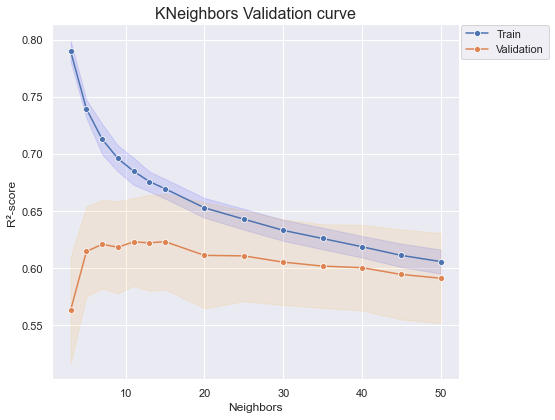

In [73]:
plot_validation_curve_by(reg, "KNeighbors", "R2SCORE", X_train, y_train, param_name="kneighborsregressor__n_neighbors", param_range=n_neighbors, param_name_short="Neighbors", cv=kfold)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    
    
    <ul style="list-style-type: square;">
        <li>For <b>Neighbors values of 20 to 50</b>, we can see a <b>High Bias</b> and <b>Low Variance</b> so, for this parameters the model is <b>Underfitting</b> maybe due to have a poor feature set <br>or the relationships in the data are inherently</li>
        <li>For <b>Neighbors values of 3 to 13</b>, we have a poorly performs for train and validation set so, for this parameters the model is <b>Underfitting</b> as well</li>
        <li>The best result if for <b>Neighbors value of 15</b> but, like the previous point we have a poorly performs for both sets. So, in general the model is <b>Underfitting</b></li>
    </ul>
    
</div>

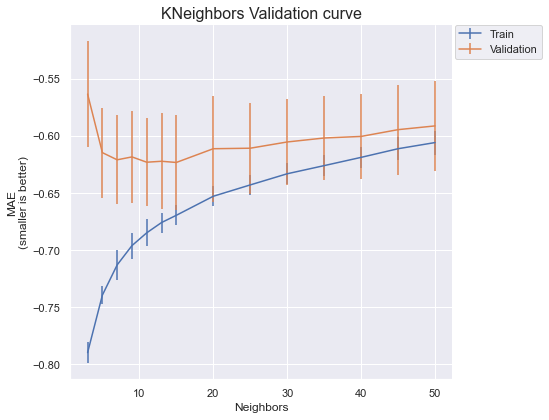

In [74]:
plot_validation_curve_by(reg, "KNeighbors", "MAE", X_train, y_train, param_name="kneighborsregressor__n_neighbors", param_range=n_neighbors, param_name_short="Neighbors", cv=kfold)

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.2.2 KNeighbors Learning curve</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Learning curve</b>, we are going to use the <b>best  parameters</b> to analyze the model
</div>

In [75]:
kfold = KFold(n_splits=5, shuffle=False, random_state=None)

reg = make_pipeline(preprocessor, KNeighborsRegressor(n_neighbors=search.best_params_.get("kneighborsregressor__n_neighbors"), 
                                                      metric=search.best_params_.get("kneighborsregressor__metric"))
                   )

<div class="alert alert-block alert-info">
    Plotting <b>the learning curve</b> based on the best parameters
</div>

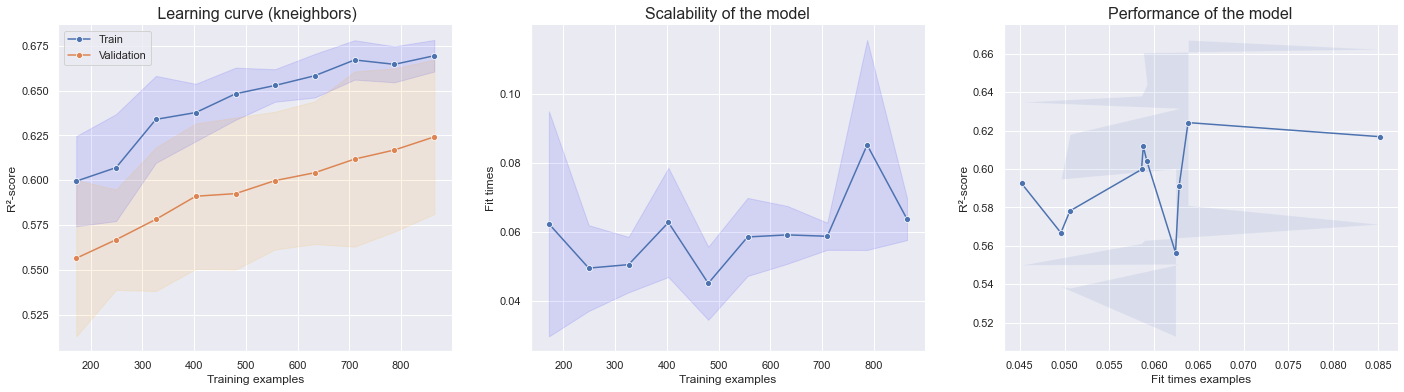

In [76]:
plot_learning_curve(reg, "kneighbors", X_train, y_train, cv=kfold)

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.2.3 KNeighbors predictions validations</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>predictions validations</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> and <b>predicting</b> values</b>
</div>

In [77]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

reg = make_pipeline(preprocessor, KNeighborsRegressor(n_neighbors=search.best_params_.get("kneighborsregressor__n_neighbors"), 
                                                      metric=search.best_params_.get("kneighborsregressor__metric"))
                   )

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

<div class="alert alert-block alert-info">
    Plotting <b>the Cross-Validated Predictions</b> based on the best parameters for <b>training data</b>
</div>

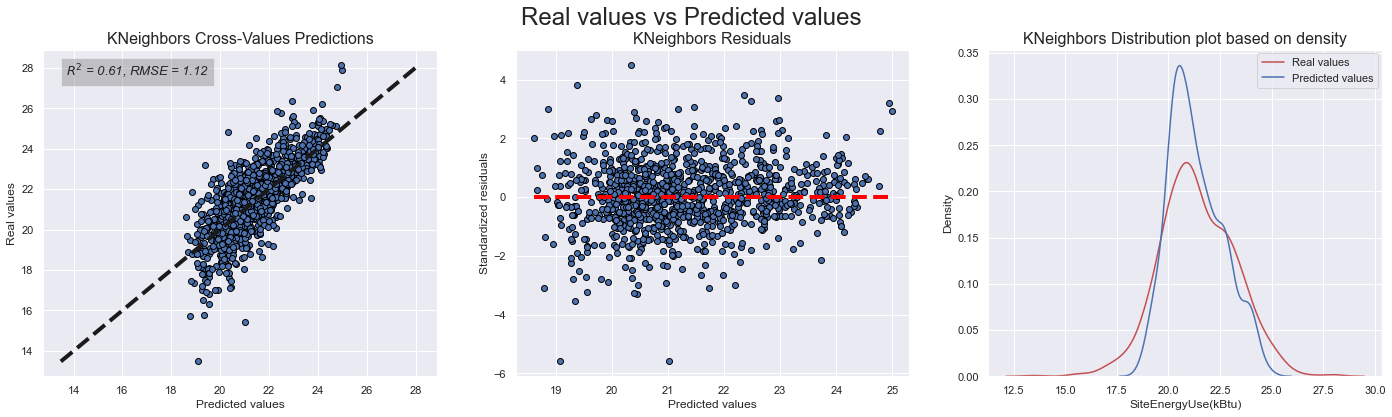

In [78]:
# Making the prediction using the testing data
plot_cross_val_predi(reg, "KNeighbors", "SiteEnergyUse(kBtu)", X_train, y_train, cv=kfold)

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.2.4 KNeighbors Features Importance</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Features Importance</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> values</b>
</div>

In [79]:
reg = make_pipeline(preprocessor, KNeighborsRegressor(n_neighbors=search.best_params_.get("kneighborsregressor__n_neighbors"), 
                                                      metric=search.best_params_.get("kneighborsregressor__metric"))
                   )

reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<function boolean_transformation at 0x0000020959AA2D30>))]),
                                                  ['NaturalGas', 'SteamUse',
                                                   'OtherFuelUse']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Neighborhoo...
                                                                   FunctionTransformer(func=<functio

<div class="alert alert-block alert-info">
    Plotting <b>the Features Importance</b> based on the best parameters
</div>

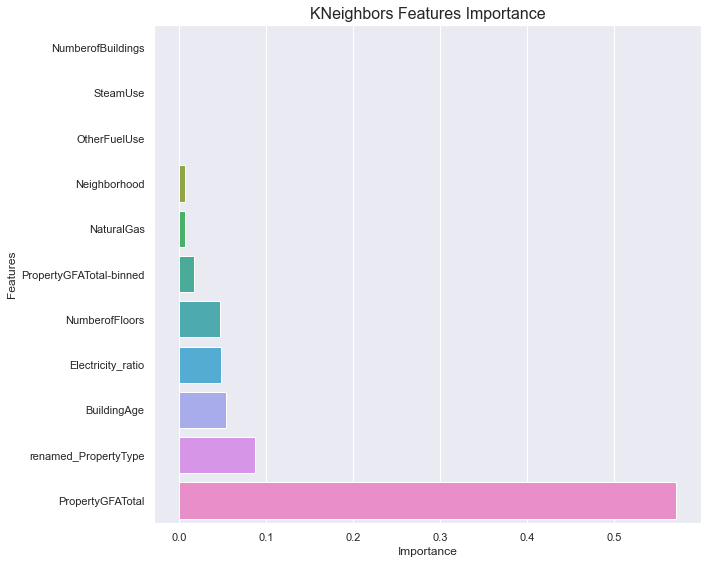

In [80]:
plot_features_importance(reg, "KNeighbors", X_train, y_train, scoring="r2")

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.2.5 Find the k Nearest Neighbors</h4>
</div>

<div class="alert alert-block alert-info">
    We are going to <b>process data</b> directly with <b>make_column_transformer</b> already defined
</div>

In [81]:
X_train_transformed = preprocessor.fit_transform(X_train)

In [82]:
X_train_transformed.shape

(1081, 29)

In [83]:
X_test_transformed = preprocessor.fit_transform(X_test)

In [84]:
X_test_transformed.shape

(533, 29)

<div class="alert alert-block alert-info">
    Now, we are going to select <b>one random sample</b> of X_test to find its Neighbors
</div>

In [85]:
seed(0)

# considering the X_test shape
indice = randint(0, 496, 1)
indice

array([172])

In [86]:
X_test_sample_transformed = X_test_transformed[indice]

<div class="alert alert-block alert-info">
    Initializing model
</div>

In [87]:
nbrs = NearestNeighbors(n_neighbors=15, metric="euclidean")

<div class="alert alert-block alert-info">
    Fitting the NearestNeighbors
</div>

In [88]:
nbrs.fit(X_train_transformed)

NearestNeighbors(metric='euclidean', n_neighbors=15)

<div class="alert alert-block alert-info">
    Finding the neighbors
</div>

In [89]:
distances, indices = nbrs.kneighbors(X_test_sample_transformed)

<div class="alert alert-block alert-info">
    Sample selected
</div>

In [90]:
X_test.iloc[indice]

,NumberofFloors,NumberofBuildings,BuildingAge,PropertyGFATotal,PropertyGFATotal-binned,Neighborhood,renamed_PropertyType,Electricity_ratio,NaturalGas,SteamUse,OtherFuelUse
1391,2.0,1.0,84.0,24430.0,Small,GREATER DUWAMISH,Warehouse,73.19705,True,False,False


<div class="alert alert-block alert-info">
    Sample selected neighbors
</div>

In [91]:
X_train.iloc[indices[0].tolist()]

,NumberofFloors,NumberofBuildings,BuildingAge,PropertyGFATotal,PropertyGFATotal-binned,Neighborhood,renamed_PropertyType,Electricity_ratio,NaturalGas,SteamUse,OtherFuelUse
1356,1.0,1.0,68.0,24990.0,Small,GREATER DUWAMISH,Warehouse,82.18331,True,False,False
1345,1.0,1.0,74.0,21349.0,Small,GREATER DUWAMISH,Warehouse,60.69392,True,False,False
1383,2.0,1.0,95.0,20400.0,Small,GREATER DUWAMISH,Warehouse,56.94794,True,False,False
1350,1.0,1.0,66.0,23100.0,Small,GREATER DUWAMISH,Warehouse,63.06898,True,False,False
1365,1.0,1.0,84.0,41248.0,Small,GREATER DUWAMISH,Warehouse,82.64570,True,False,False
1399,1.0,1.0,69.0,16300.0,Small,GREATER DUWAMISH,Warehouse,66.55644,True,False,False
1435,1.0,1.0,60.0,25577.0,Small,GREATER DUWAMISH,Warehouse,81.18214,True,False,False
1411,2.0,1.0,65.0,28800.0,Small,GREATER DUWAMISH,Warehouse,59.19752,True,False,False
1416,1.0,1.0,61.0,25000.0,Small,GREATER DUWAMISH,Warehouse,62.46494,True,False,False
1364,1.0,1.0,69.0,39600.0,Small,GREATER DUWAMISH,Warehouse,78.73550,True,False,False


<div class="alert alert-block alert-info">
    Mean values for features and target based on neighbors
</div>

In [92]:
X_train.iloc[indices[0].tolist()].mean()

NumberofFloors           1.200000
NumberofBuildings        1.000000
BuildingAge             74.000000
PropertyGFATotal     29103.266667
Electricity_ratio       71.023021
NaturalGas               1.000000
SteamUse                 0.000000
OtherFuelUse             0.000000
dtype: float64

In [93]:
y_train.iloc[indices[0].tolist()].mean()

19.245218995672918

<div class="alert alert-block alert-info">
    Real values for test
</div>

In [94]:
y_test.iloc[indice]

1391    20.307717
Name: SiteEnergyUse(kBtu), dtype: float64

<div class="alert alert-block alert-success">
    At this point, we can see that the prediction is very close to real value
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.2.6 Predictions metrics</h4>
</div>

<div class="alert alert-block alert-info">
    We are going to make the prediction with the testing set to compare the result with the model in default mode
</div>

In [95]:
start_time_model = timeit.default_timer()

reg = make_pipeline(preprocessor, KNeighborsRegressor(n_neighbors=search.best_params_.get("kneighborsregressor__n_neighbors"), 
                                                      metric=search.best_params_.get("kneighborsregressor__metric"))
                   )

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

# Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
R2SCORE = round((1 - r2_score(y_test, y_pred)), 5)
    
# Calculating the Mean absolute error (The best value is 0.0)
MAE = round(mean_absolute_error(y_test, y_pred), 3)
    
# Calculating Root Mean Square Error for each model (The best value is 0.0)
RMSE = round(mean_squared_error(y_test, y_pred, squared=False), 3)

<div class="alert alert-block alert-info">
    Adding the prediction to compare at the end
</div>

In [96]:
# Concatenating predictions to compare against y_test_transformed
df_temp = pd.DataFrame({
    "Model" : "KNeighbors",
    "y_pred" : y_pred
})

In [97]:
# Concatenating predictions to compare against y_test_transformed
df_y_pred_hyperparameters = pd.concat([df_y_pred_hyperparameters, df_temp])

<div class="alert alert-block alert-info">
    Verifying the prediction model into the dataset
</div>

In [98]:
df_y_pred_hyperparameters["Model"].unique()

array(['Original', 'LinearRegression', 'KNeighbors'], dtype=object)

<div class="alert alert-block alert-info">
    Adding metrics to compare at the end
</div>

In [99]:
df_temp = pd.DataFrame({
    "Model" : ["KNeighbors"],
    "1 - " + "R2".translate(SUP) : [R2SCORE], 
    "MAE" : [MAE],    
    "RMSE" : [RMSE],
    "Duration" : [end_time_model]
})

In [100]:
# Concatenating metrics to compare against model with default parameters
df_models_hyperparameters = pd.concat([df_models_hyperparameters, df_temp])

In [101]:
df_models_hyperparameters

,Model,1 - R²,MAE,RMSE,Duration
0,LinearRegression,0.34134,0.797,1.074,0.050
0,KNeighbors,0.37557,0.833,1.126,0.137


<div class="alert alert-block alert-success">
    Compared to the model with default parameters, we can see that the result (for Linear Regression) has improved
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.3. Lasso optimization</h3>
</div>

<div class="alert alert-block alert-info">
    Initializing model
</div>

In [102]:
ls = Lasso()

<div class="alert alert-block alert-info">
    Data preprocessing based on the pipelines and the regressors setup
</div>

In [103]:
reg = make_pipeline(preprocessor, ls)

<div class="alert alert-block alert-info">
    Identifying the names of each parameter
</div>

In [104]:
sorted(reg.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__functiontransformer',
 'columntransformer__pipeline-1__functiontransformer__accept_sparse',
 'columntransformer__pipeline-1__functiontransformer__check_inverse',
 'columntransformer__pipeline-1__functiontransformer__func',
 'columntransformer__pipeline-1__functiontransformer__inv_kw_args',
 'columntransformer__pipeline-1__functiontransformer__inverse_func',
 'columntransformer__pipeline-1__functiontransformer__kw_args',
 'columntransformer__pipeline-1__functiontransformer__validate',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__onehotencoder',
 'columntransformer__pipeline-2__onehotencoder__categories',
 'columntransformer__pipeline-2__onehotencoder__drop',
 'columntransformer__pipe

<div class="alert alert-block alert-info">
    Parameters settings
</div>

In [105]:
param_grid = {
    "lasso__alpha" : np.arange(0.01, 1, 0.01), # Constant that multiplies the L1 term.
    "lasso__copy_X" : [True, False], # If True, X will be copied; else, it may be overwritten.
    "lasso__fit_intercept" : [True, False] # Whether to calculate the intercept for this model.
}

<div class="alert alert-block alert-info">
    Executing the model
</div>

In [106]:
# K-Folds cross-validator
kfold = KFold(n_splits=5, shuffle=False, random_state=None)

search = GridSearchCV(reg, param_grid, n_jobs=-2, cv=kfold, scoring=SCORINGS, refit="R2", return_train_score=True)

search.fit(X_train, y_train)

# Transforming the result to dataframe format
df_results = pd.DataFrame(search.cv_results_)

# Get the results
print("Metrics based on the best R2".translate(SUP))
print("- 1 - " + "R2:".translate(SUP), round((1 - search.best_score_), 3))
print("- MAE:", round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3))
print("- RMSE:", round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3))
print("- Duration:", round(df_results.iloc[search.best_index_]["mean_score_time"], 3))
print("- Parameters:", search.best_params_)

Metrics based on the best R²
- 1 - R²: 0.369
- MAE: 0.821
- RMSE: 1.099
- Duration: 0.027
- Parameters: {'lasso__alpha': 0.01, 'lasso__copy_X': True, 'lasso__fit_intercept': True}


<div class="alert alert-block alert-info">
    Adding metrics to compare at the end
</div>

In [107]:
df_temp = pd.DataFrame({
    "Model" : ["Lasso"],
    "1 - " + "R2".translate(SUP) : round((1 - search.best_score_), 3), 
    "MAE" : round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3),    
    "RMSE" : round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3),
    "Duration" : round(df_results.iloc[search.best_index_]["mean_score_time"], 3)
})

In [108]:
# Concatenating metrics to compare against model with default parameters
df_models_metrics_gsc = pd.concat([df_models_metrics_gsc, df_temp])

In [109]:
df_models_metrics_gsc

,Model,1 - R²,MAE,RMSE,Duration
0,LinearRegression,0.381,0.825,1.108,0.021
0,KNeighbors,0.377,0.833,1.111,0.057
0,Lasso,0.369,0.821,1.099,0.027


<div class="alert alert-block alert-success">
    We got the <b>best parameters</b> so, we are going to <b>analyze</b> them more in details 
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.3.1 Lasso Validation curve</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Validation curve</b>, we are going to use a <b>range of alpha</b> to analyze the model through them
</div>

In [110]:
kfold = KFold(n_splits=5, shuffle=False, random_state=None)

alpha = np.arange(0.01, 1, 0.01).tolist()

reg = make_pipeline(preprocessor, Lasso(copy_X=search.best_params_.get("lasso__copy_X"), 
                                        fit_intercept=search.best_params_.get("lasso__fit_intercept"))
                   )

<div class="alert alert-block alert-info">
    Plotting <b>the validacion curve</b> based on the best parameters
</div>

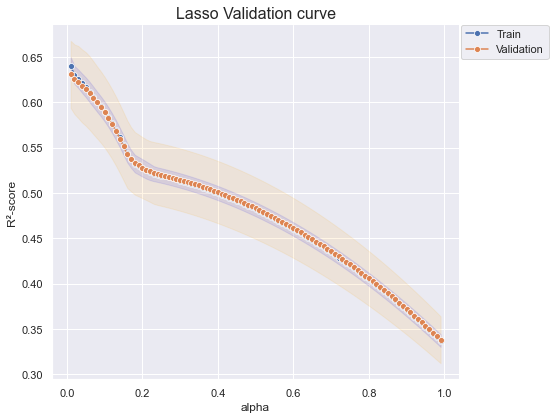

In [111]:
plot_validation_curve_by(reg, "Lasso", "R2SCORE", X_train, y_train, param_name="lasso__alpha", param_range=alpha, param_name_short="alpha", cv=kfold)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    
    <p>As you go through <b>alpha</b> you can see how the score decrease. We can say that the model is <b>Underfitting</b> maybe due to have a poor feature set <br>or the relationships in the data are inherently</p>
    <p>We have have to consider that <b>Lasso</b> is a type of regularized linear regression that includes an L1 penalsy so, it considers a Linear regresion among the features and the targed. On the other hand, we are working with a Non-linear dataset.</p>

</div>

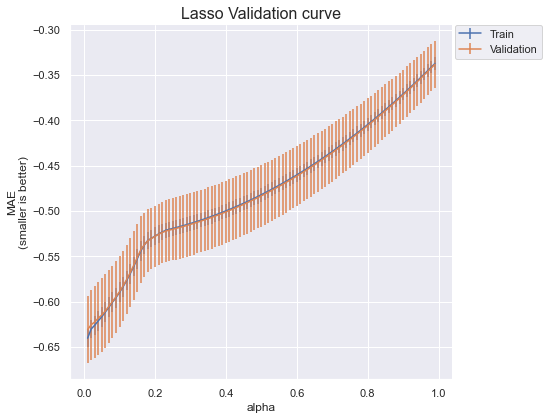

In [112]:
plot_validation_curve_by(reg, "Lasso", "MAE", X_train, y_train, param_name="lasso__alpha", param_range=alpha, param_name_short="alpha", cv=kfold)

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.3.2 Lasso Learning curve</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Learning curve</b>, we are going to use the <b>best  parameters</b> to analyze the model
</div>

In [113]:
kfold = KFold(n_splits=5, shuffle=False, random_state=None)

reg = make_pipeline(preprocessor, Lasso(alpha=search.best_params_.get("lasso__alpha"), 
                                        copy_X=search.best_params_.get("lasso__copy_X"), 
                                        fit_intercept=search.best_params_.get("lasso__fit_intercept"))
                   )

<div class="alert alert-block alert-info">
    Plotting <b>the learning curve</b> based on the best parameters
</div>

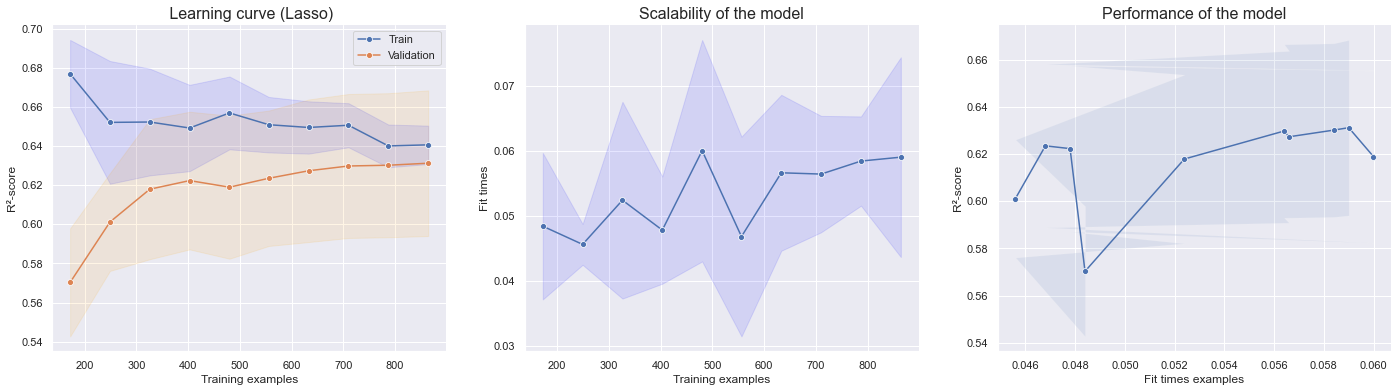

In [114]:
plot_learning_curve(reg, "Lasso", X_train, y_train, cv=kfold)

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.3.3 Lasso predictions validations</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>predictions validations</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> and <b>predicting</b> values</b>
</div>

In [115]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

reg = make_pipeline(preprocessor, Lasso(alpha=search.best_params_.get("lasso__alpha"), 
                                        copy_X=search.best_params_.get("lasso__copy_X"), 
                                        fit_intercept=search.best_params_.get("lasso__fit_intercept"))
                   )

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

<div class="alert alert-block alert-info">
    Plotting <b>the Cross-Validated Predictions</b> based on the best parameters for <b>training data</b>
</div>

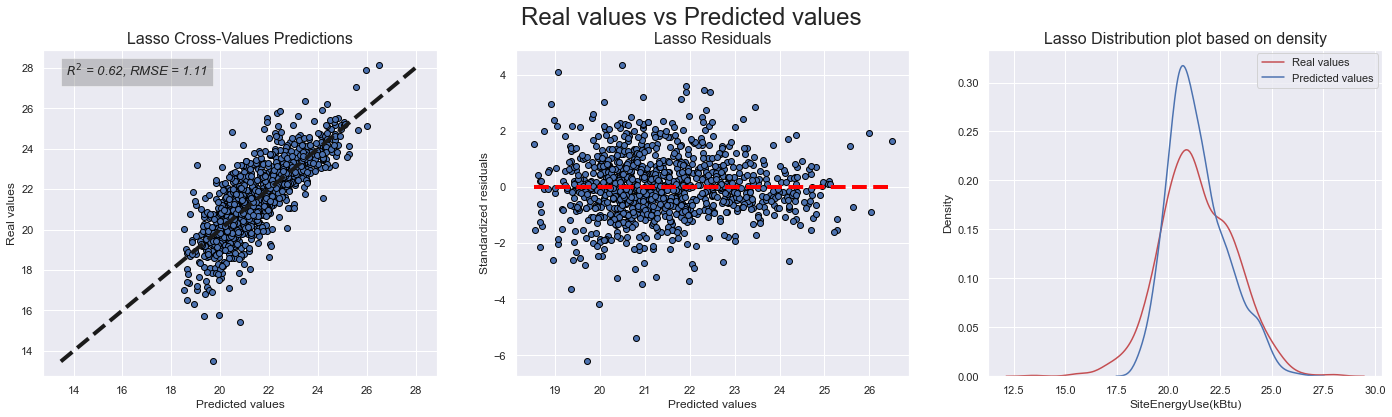

In [116]:
# Making the prediction using the testing data
plot_cross_val_predi(reg, "Lasso", "SiteEnergyUse(kBtu)", X_train, y_train, cv=kfold)

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.3.4 Lasso Features Importance</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Features Importance</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> values</b>
</div>

In [117]:
reg = make_pipeline(preprocessor, Lasso(alpha=search.best_params_.get("lasso__alpha"), 
                                        copy_X=search.best_params_.get("lasso__copy_X"), 
                                        fit_intercept=search.best_params_.get("lasso__fit_intercept"))
                   )

reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<function boolean_transformation at 0x0000020959AA2D30>))]),
                                                  ['NaturalGas', 'SteamUse',
                                                   'OtherFuelUse']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Neighborhoo...
                                                                   KNNImputer()),
                  

<div class="alert alert-block alert-info">
    Plotting <b>the Features Importance</b> based on the best parameters
</div>

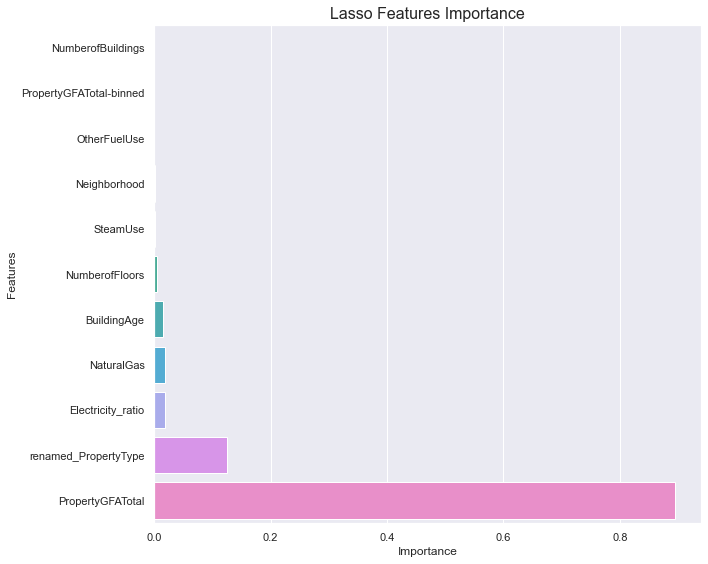

In [118]:
plot_features_importance(reg, "Lasso", X_train, y_train, scoring="r2")

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.3.5 Predictions metrics</h4>
</div>

<div class="alert alert-block alert-info">
    We are going to make the prediction with the testing set to compare the result with the model in default mode
</div>

In [119]:
start_time_model = timeit.default_timer()

reg = make_pipeline(preprocessor, Lasso(alpha=search.best_params_.get("lasso__alpha"), 
                                        copy_X=search.best_params_.get("lasso__copy_X"), 
                                        fit_intercept=search.best_params_.get("lasso__fit_intercept"))
                   )

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

# Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
R2SCORE = round((1 - r2_score(y_test, y_pred)), 5)
    
# Calculating the Mean absolute error (The best value is 0.0)
MAE = round(mean_absolute_error(y_test, y_pred), 3)
    
# Calculating Root Mean Square Error for each model (The best value is 0.0)
RMSE = round(mean_squared_error(y_test, y_pred, squared=False), 3)

<div class="alert alert-block alert-info">
    Adding the prediction to compare at the end
</div>

In [120]:
# Concatenating predictions to compare against y_test_transformed
df_temp = pd.DataFrame({
    "Model" : "Lasso",
    "y_pred" : y_pred
})

In [121]:
# Concatenating predictions to compare against y_test_transformed
df_y_pred_hyperparameters = pd.concat([df_y_pred_hyperparameters, df_temp])

<div class="alert alert-block alert-info">
    Verifying the prediction model into the dataset
</div>

In [122]:
df_y_pred_hyperparameters["Model"].unique()

array(['Original', 'LinearRegression', 'KNeighbors', 'Lasso'],
      dtype=object)

<div class="alert alert-block alert-info">
    Adding metrics to compare at the end
</div>

In [123]:
df_temp = pd.DataFrame({
    "Model" : ["Lasso"],
    "1 - " + "R2".translate(SUP) : [R2SCORE], 
    "MAE" : [MAE],    
    "RMSE" : [RMSE],
    "Duration" : [end_time_model]
})

In [124]:
# Concatenating metrics to compare against model with default parameters
df_models_hyperparameters = pd.concat([df_models_hyperparameters, df_temp])

In [125]:
df_models_hyperparameters

,Model,1 - R²,MAE,RMSE,Duration
0,LinearRegression,0.34134,0.797,1.074,0.050
0,KNeighbors,0.37557,0.833,1.126,0.137
0,Lasso,0.35410,0.822,1.094,0.040


<div class="alert alert-block alert-success">
    Compared to the model with default parameters, we can see how the result improved for Lasso
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.4. SVR optimization</h3>
</div>

<div class="alert alert-block alert-info">
    Initializing model
</div>

In [126]:
svr = SVR()

<div class="alert alert-block alert-info">
    Data preprocessing based on the pipelines and the regressors setup
</div>

In [127]:
reg = make_pipeline(preprocessor, svr)

<div class="alert alert-block alert-info">
    Identifying the names of each parameter
</div>

In [128]:
sorted(reg.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__functiontransformer',
 'columntransformer__pipeline-1__functiontransformer__accept_sparse',
 'columntransformer__pipeline-1__functiontransformer__check_inverse',
 'columntransformer__pipeline-1__functiontransformer__func',
 'columntransformer__pipeline-1__functiontransformer__inv_kw_args',
 'columntransformer__pipeline-1__functiontransformer__inverse_func',
 'columntransformer__pipeline-1__functiontransformer__kw_args',
 'columntransformer__pipeline-1__functiontransformer__validate',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__onehotencoder',
 'columntransformer__pipeline-2__onehotencoder__categories',
 'columntransformer__pipeline-2__onehotencoder__drop',
 'columntransformer__pipe

<div class="alert alert-block alert-info">
    Parameters settings
</div>

In [129]:
param_grid = {
    "svr__kernel" : ["linear", "poly", "rbf"], # Specifies the kernel type to be used in the algorithm.
    "svr__gamma" : ["auto", "scale"], # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    "svr__C" : [1.5, 10], # Regularization parameter. The strength of the regularization is inversely proportional to C.
    "svr__epsilon" : [0.1, 0.2, 0.5, 0.3] # It specifies the epsilon-tube within which no penalty is associated 
                                       # in the training loss function with points predicted within a distance epsilon from the actual value.
}

<div class="alert alert-block alert-info">
    Executing the model
</div>

In [130]:
# K-Folds cross-validator
kfold = KFold(n_splits=5, shuffle=False, random_state=None)

search = GridSearchCV(reg, param_grid, n_jobs=-2, cv=kfold, scoring=SCORINGS, refit="R2", return_train_score=True)

search.fit(X_train, y_train)

# Transforming the result to dataframe format
df_results = pd.DataFrame(search.cv_results_)

# Get the results
print("Metrics based on the best R2".translate(SUP))
print("- 1 - " + "R2:".translate(SUP), round((1 - search.best_score_), 3))
print("- MAE:", round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3))
print("- RMSE:", round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3))
print("- Duration:", round(df_results.iloc[search.best_index_]["mean_score_time"], 3))
print("- Parameters:", search.best_params_)

Metrics based on the best R²
- 1 - R²: 0.35
- MAE: 0.784
- RMSE: 1.069
- Duration: 0.044
- Parameters: {'svr__C': 10, 'svr__epsilon': 0.2, 'svr__gamma': 'auto', 'svr__kernel': 'rbf'}


<div class="alert alert-block alert-info">
    Adding metrics to compare at the end
</div>

In [131]:
df_temp = pd.DataFrame({
    "Model" : ["SVR"],
    "1 - " + "R2".translate(SUP) : round((1 - search.best_score_), 3), 
    "MAE" : round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3),    
    "RMSE" : round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3),
    "Duration" : round(df_results.iloc[search.best_index_]["mean_score_time"], 3)
})

In [132]:
# Concatenating metrics to compare against model with default parameters
df_models_metrics_gsc = pd.concat([df_models_metrics_gsc, df_temp])

In [133]:
df_models_metrics_gsc

,Model,1 - R²,MAE,RMSE,Duration
0,LinearRegression,0.381,0.825,1.108,0.021
0,KNeighbors,0.377,0.833,1.111,0.057
0,Lasso,0.369,0.821,1.099,0.027
0,SVR,0.350,0.784,1.069,0.044


<div class="alert alert-block alert-success">
    We got the <b>best parameters</b> so, we are going to <b>analyze</b> them more in details 
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.4.1 SVR Validation curve</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Validation curve</b>, we are going to use a <b>range of alpha</b> to analyze the model through them
</div>

In [134]:
kfold = KFold(n_splits=5, shuffle=False, random_state=None)

gamma = np.arange(0.01, 1, 0.05).tolist()

reg = make_pipeline(preprocessor, SVR(C=search.best_params_.get("svr__C"),
                                      epsilon=search.best_params_.get("svr__epsilon"), 
                                      kernel=search.best_params_.get("svr__kernel"))
                   )

<div class="alert alert-block alert-info">
    Plotting <b>the validacion curve</b> based on the best parameters
</div>

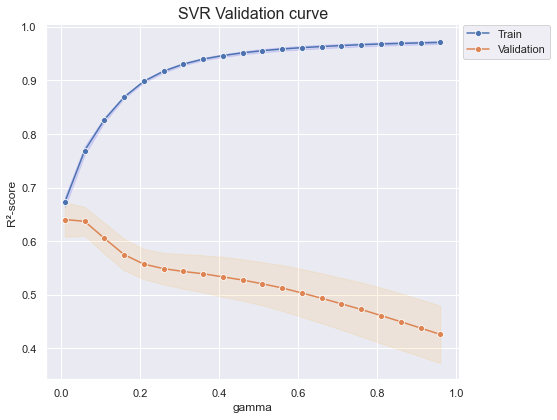

In [135]:
plot_validation_curve_by(reg, "SVR", "R2SCORE", X_train, y_train, param_name="svr__gamma", param_range=gamma, param_name_short="gamma", cv=kfold)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    
    <p>As you go through <b>gamma</b> you can see how the bias increase between train and validation set. We can say that the model is <b>Overfitting</b> 
</div>

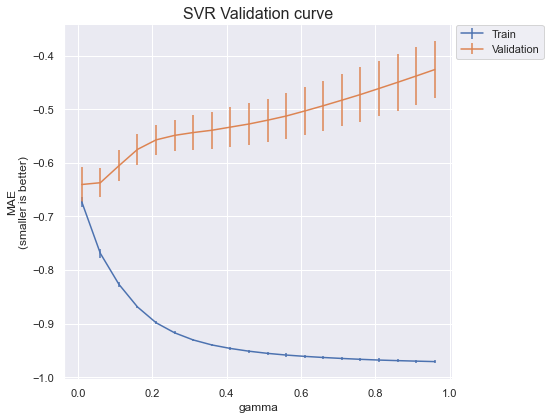

In [136]:
plot_validation_curve_by(reg, "SVR", "MAE", X_train, y_train, param_name="svr__gamma", param_range=gamma, param_name_short="gamma", cv=kfold)

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.4.2 SVR Learning curve</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Learning curve</b>, we are going to use the <b>best  parameters</b> to analyze the model
</div>

In [137]:
kfold = KFold(n_splits=5, shuffle=False, random_state=None)

reg = make_pipeline(preprocessor, SVR(C=search.best_params_.get("svr__C"),
                                      epsilon=search.best_params_.get("svr__epsilon"), 
                                      kernel=search.best_params_.get("svr__kernel"), 
                                      gamma=search.best_params_.get("svr__gamma"))
                   )

<div class="alert alert-block alert-info">
    Plotting <b>the learning curve</b> based on the best parameters
</div>

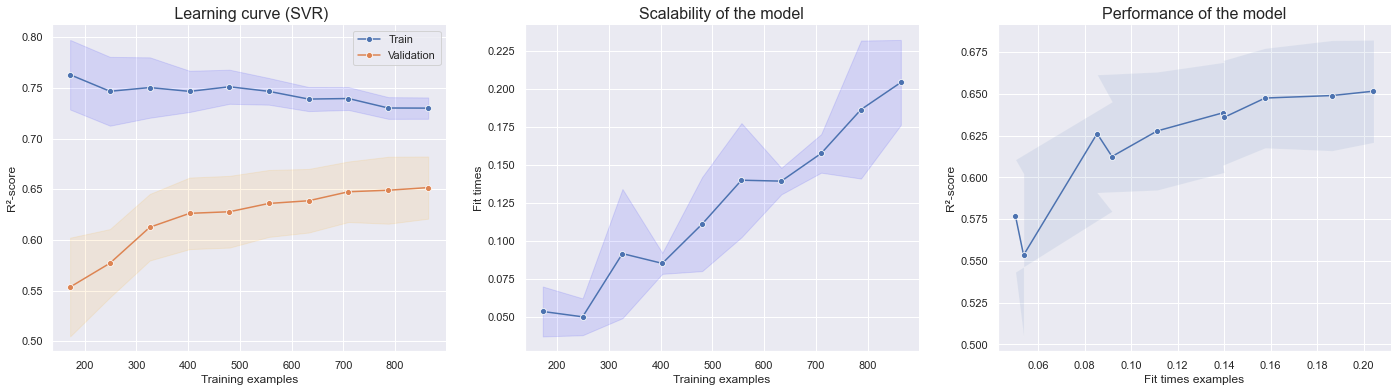

In [138]:
plot_learning_curve(reg, "SVR", X_train, y_train, cv=kfold)

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.4.3 SVR predictions validations</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>predictions validations</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> and <b>predicting</b> values</b>
</div>

In [139]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

reg = make_pipeline(preprocessor, SVR(C=search.best_params_.get("svr__C"),
                                      epsilon=search.best_params_.get("svr__epsilon"), 
                                      kernel=search.best_params_.get("svr__kernel"), 
                                      gamma=search.best_params_.get("svr__gamma"))
                   )

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

<div class="alert alert-block alert-info">
    Plotting <b>the Cross-Validated Predictions</b> based on the best parameters for <b>training data</b>
</div>

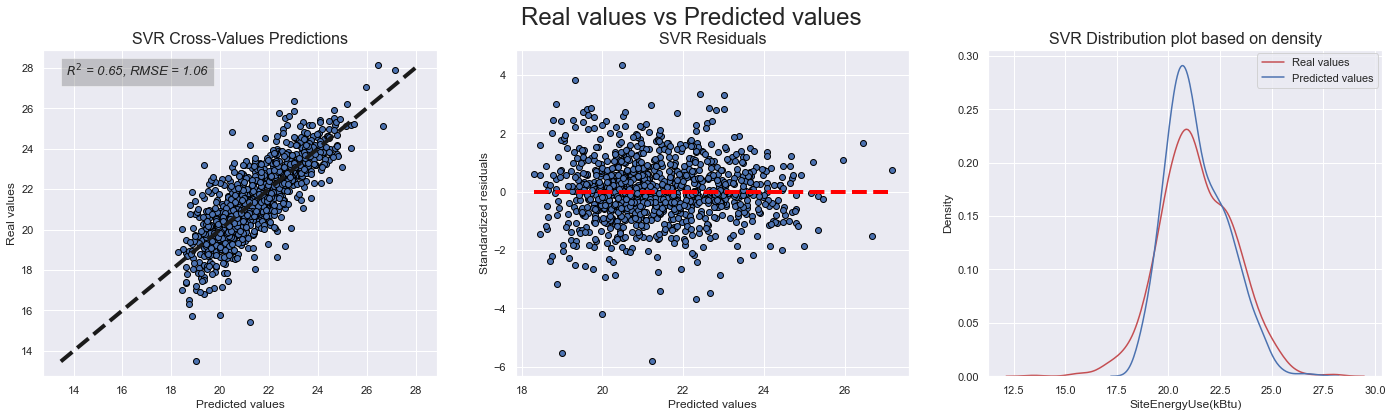

In [140]:
# Making the prediction using the testing data
plot_cross_val_predi(reg, "SVR", "SiteEnergyUse(kBtu)", X_train, y_train, cv=kfold)

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.4.4 SVR Features Importance</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Features Importance</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> values</b>
</div>

In [141]:
reg = make_pipeline(preprocessor, SVR(C=search.best_params_.get("svr__C"),
                                      epsilon=search.best_params_.get("svr__epsilon"), 
                                      kernel=search.best_params_.get("svr__kernel"), 
                                      gamma=search.best_params_.get("svr__gamma"))
                   )

reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<function boolean_transformation at 0x0000020959AA2D30>))]),
                                                  ['NaturalGas', 'SteamUse',
                                                   'OtherFuelUse']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Neighborhoo...
                                                                  ('functiontransformer',
          

<div class="alert alert-block alert-info">
    Plotting <b>the Features Importance</b> based on the best parameters
</div>

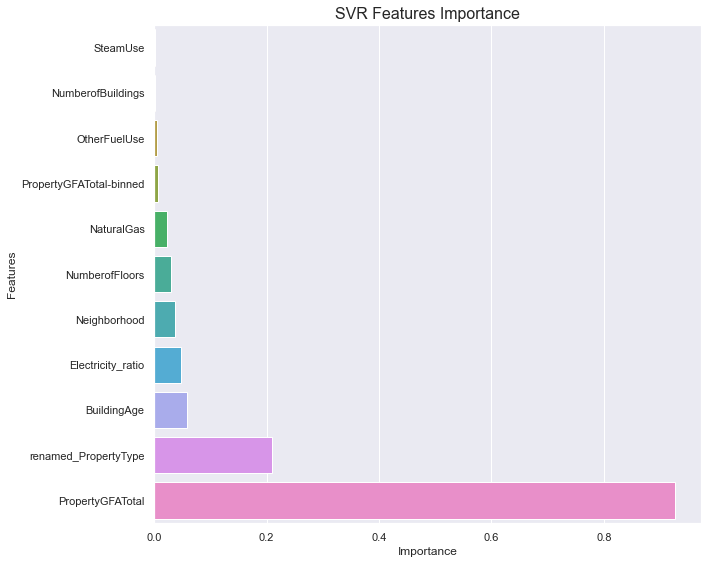

In [142]:
plot_features_importance(reg, "SVR", X_train, y_train, scoring="r2")

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.4.5 Predictions metrics</h4>
</div>

<div class="alert alert-block alert-info">
    We are going to make the prediction with the testing set to compare the result with the model in default mode
</div>

In [143]:
start_time_model = timeit.default_timer()

reg = make_pipeline(preprocessor, SVR(C=search.best_params_.get("svr__C"),
                                      epsilon=search.best_params_.get("svr__epsilon"), 
                                      kernel=search.best_params_.get("svr__kernel"), 
                                      gamma=search.best_params_.get("svr__gamma"))
                   )

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

# Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
R2SCORE = round((1 - r2_score(y_test, y_pred)), 5)
    
# Calculating the Mean absolute error (The best value is 0.0)
MAE = round(mean_absolute_error(y_test, y_pred), 3)
    
# Calculating Root Mean Square Error for each model (The best value is 0.0)
RMSE = round(mean_squared_error(y_test, y_pred, squared=False), 3)

<div class="alert alert-block alert-info">
    Adding the prediction to compare at the end
</div>

In [144]:
# Concatenating predictions to compare against y_test_transformed
df_temp = pd.DataFrame({
    "Model" : "SVR",
    "y_pred" : y_pred
})

In [145]:
# Concatenating predictions to compare against y_test_transformed
df_y_pred_hyperparameters = pd.concat([df_y_pred_hyperparameters, df_temp])

<div class="alert alert-block alert-info">
    Verifying the prediction model into the dataset
</div>

In [146]:
df_y_pred_hyperparameters["Model"].unique()

array(['Original', 'LinearRegression', 'KNeighbors', 'Lasso', 'SVR'],
      dtype=object)

<div class="alert alert-block alert-info">
    Adding metrics to compare at the end
</div>

In [147]:
df_temp = pd.DataFrame({
    "Model" : ["SVR"],
    "1 - " + "R2".translate(SUP) : [R2SCORE], 
    "MAE" : [MAE],    
    "RMSE" : [RMSE],
    "Duration" : [end_time_model]
})

In [148]:
# Concatenating metrics to compare against model with default parameters
df_models_hyperparameters = pd.concat([df_models_hyperparameters, df_temp])

In [149]:
df_models_hyperparameters

,Model,1 - R²,MAE,RMSE,Duration
0,LinearRegression,0.34134,0.797,1.074,0.050
0,KNeighbors,0.37557,0.833,1.126,0.137
0,Lasso,0.35410,0.822,1.094,0.040
0,SVR,0.32585,0.773,1.049,0.218


<div class="alert alert-block alert-success">
    Compared to the model with default parameters, we can see how the result improved a little for SVR
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.5. Random Forest optimization</h3>
</div>

<div class="alert alert-block alert-info">
    Initializing model
</div>

In [150]:
regr = RandomForestRegressor()

<div class="alert alert-block alert-info">
    Data preprocessing based on the pipelines and the regressors setup
</div>

In [151]:
reg = make_pipeline(preprocessor, regr)

<div class="alert alert-block alert-info">
    Identifying the names of each parameter
</div>

In [152]:
sorted(reg.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__functiontransformer',
 'columntransformer__pipeline-1__functiontransformer__accept_sparse',
 'columntransformer__pipeline-1__functiontransformer__check_inverse',
 'columntransformer__pipeline-1__functiontransformer__func',
 'columntransformer__pipeline-1__functiontransformer__inv_kw_args',
 'columntransformer__pipeline-1__functiontransformer__inverse_func',
 'columntransformer__pipeline-1__functiontransformer__kw_args',
 'columntransformer__pipeline-1__functiontransformer__validate',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__onehotencoder',
 'columntransformer__pipeline-2__onehotencoder__categories',
 'columntransformer__pipeline-2__onehotencoder__drop',
 'columntransformer__pipe

<div class="alert alert-block alert-info">
    Parameters settings
</div>

<div class="alert alert-block alert-info">
    Executing the model
</div>

In [153]:
param_grid = {
    "randomforestregressor__max_depth" : [20, 30, 40, 50, 60, 70, 80], # The maximum depth of the tree.
    "randomforestregressor__max_features" : ["auto", "sqrt"], # The number of features to consider when looking for the best split.
    "randomforestregressor__min_samples_leaf" : [1, 2, 3, 4, 5], # The minimum number of samples required to be at a leaf node.
    "randomforestregressor__min_samples_split" : [2, 4, 6, 8, 10, 12], # The minimum number of samples required to split an internal node.
    "randomforestregressor__n_estimators" : [30, 40, 50, 80, 100, 120, 140] # The number of trees in the forest.
}

In [154]:
## K-Folds cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

start_time_model = timeit.default_timer()

# search = GridSearchCV(reg, param_grid, n_jobs=-1, cv=kfold, scoring=SCORINGS, refit="R2", return_train_score=True)
search = GridSearchCV(reg, param_grid, n_jobs=-2, cv=kfold, scoring=SCORINGS, refit="R2", return_train_score=True)

search.fit(X_train, y_train)

# Transforming the result to dataframe format
df_results = pd.DataFrame(search.cv_results_)

# Get the results
print("Metrics based on the best R2".translate(SUP))
print("- 1 - " + "R2:".translate(SUP), round((1 - search.best_score_), 3))
print("- MAE:", round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3))
print("- RMSE:", round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3))
print("- Duration:", round(df_results.iloc[search.best_index_]["mean_score_time"], 3))
print("- Parameters:", search.best_params_)

Metrics based on the best R²
- 1 - R²: 0.338
- MAE: 0.787
- RMSE: 1.044
- Duration: 0.064
- Parameters: {'randomforestregressor__max_depth': 80, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__min_samples_leaf': 2, 'randomforestregressor__min_samples_split': 8, 'randomforestregressor__n_estimators': 140}


<div class="alert alert-block alert-info">
    Adding metrics to compare at the end
</div>

In [155]:
df_temp = pd.DataFrame({
    "Model" : ["Random Forest"],
    "1 - " + "R2".translate(SUP) : round((1 - search.best_score_), 3), 
    "MAE" : round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3),    
    "RMSE" : round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3),
    "Duration" : round(df_results.iloc[search.best_index_]["mean_score_time"], 3)
})

In [156]:
# Concatenating metrics to compare against model with default parameters
df_models_metrics_gsc = pd.concat([df_models_metrics_gsc, df_temp])

In [157]:
df_models_metrics_gsc

,Model,1 - R²,MAE,RMSE,Duration
0,LinearRegression,0.381,0.825,1.108,0.021
0,KNeighbors,0.377,0.833,1.111,0.057
0,Lasso,0.369,0.821,1.099,0.027
0,SVR,0.350,0.784,1.069,0.044
0,Random Forest,0.338,0.787,1.044,0.064


<div class="alert alert-block alert-info">
    We got the <b>best parameters</b> so, we are going to <b>analyze</b> them more in details 
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.5.1 Random Forest Validation curve</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Validation curve</b>, we are going to use a <b>range of neighbors</b> to analyze the model through them
</div>

In [158]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

n_estimators = np.unique(np.logspace(0, 1.8, num=search.best_params_.get("randomforestregressor__n_estimators")).astype(int))

reg = make_pipeline(preprocessor, RandomForestRegressor(max_depth=search.best_params_.get("randomforestregressor__max_depth"), 
                                                        max_features=search.best_params_.get("randomforestregressor__max_features"),
                                                        min_samples_leaf=search.best_params_.get("randomforestregressor__min_samples_leaf"), 
                                                        min_samples_split=search.best_params_.get("randomforestregressor__min_samples_split"))
                   )

<div class="alert alert-block alert-info">
    Plotting <b>the validacion curve</b> based on the best parameters
</div>

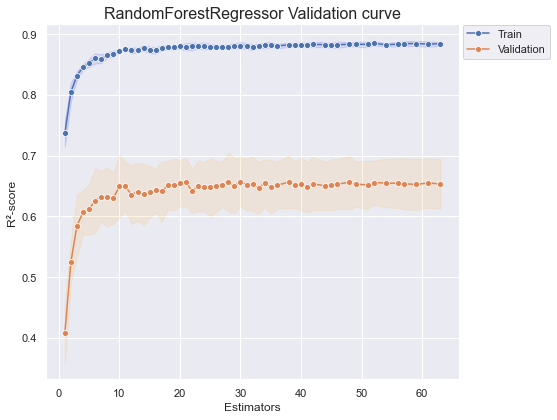

In [159]:
plot_validation_curve_by(reg, "RandomForestRegressor", "R2SCORE", X_train, y_train, param_name="randomforestregressor__n_estimators", param_range=n_estimators, param_name_short="Estimators", cv=kfold)

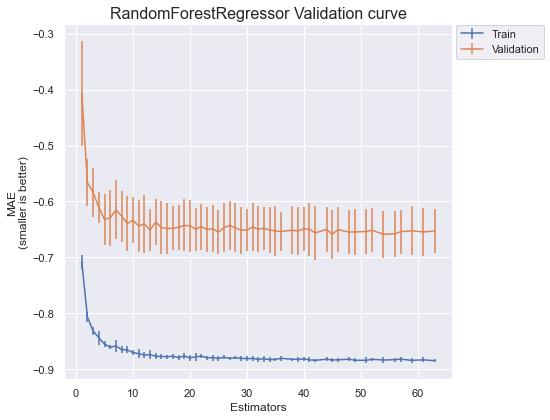

In [160]:
plot_validation_curve_by(reg, "RandomForestRegressor", "MAE", X_train, y_train, param_name="randomforestregressor__n_estimators", param_range=n_estimators, param_name_short="Estimators", cv=kfold)

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.5.2 Random Forest Learning curve</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Learning curve</b>, we are going to use the <b>best  parameters</b> to analyze the model
</div>

In [161]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

reg = make_pipeline(preprocessor, RandomForestRegressor(max_depth=search.best_params_.get("randomforestregressor__max_depth"), 
                                                        max_features=search.best_params_.get("randomforestregressor__max_features"),
                                                        min_samples_leaf=search.best_params_.get("randomforestregressor__min_samples_leaf"), 
                                                        min_samples_split=search.best_params_.get("randomforestregressor__min_samples_split"),
                                                        n_estimators=search.best_params_.get("randomforestregressor__n_estimators"))
                   )

<div class="alert alert-block alert-info">
    Plotting <b>the learning curve</b> based on the best parameters
</div>

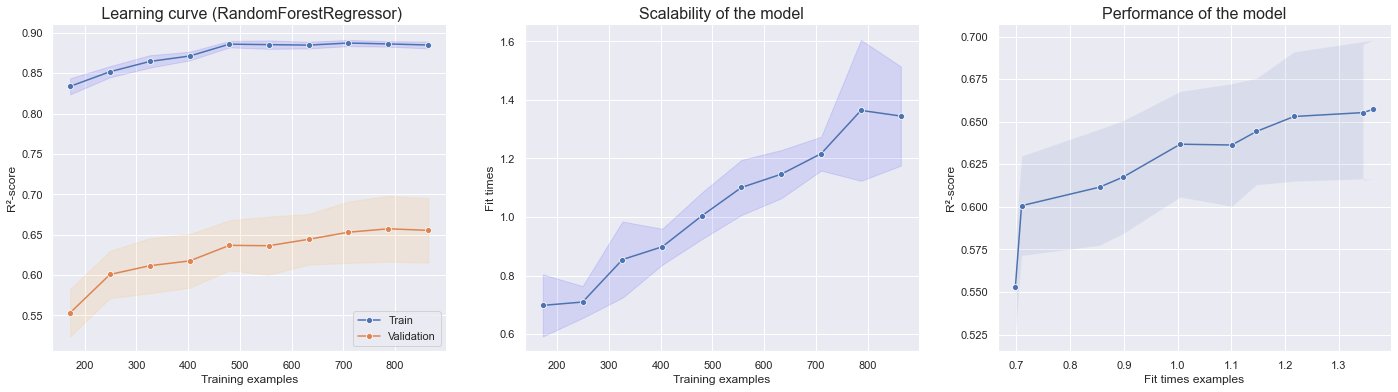

In [162]:
plot_learning_curve(reg, "RandomForestRegressor", X_train, y_train, cv=kfold)

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.5.3 Random Forest predictions validations</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>predictions validations</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> and <b>predicting</b> values</b>
</div>

In [163]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

reg = make_pipeline(preprocessor, RandomForestRegressor(max_depth=search.best_params_.get("randomforestregressor__max_depth"), 
                                                        max_features=search.best_params_.get("randomforestregressor__max_features"),
                                                        min_samples_leaf=search.best_params_.get("randomforestregressor__min_samples_leaf"), 
                                                        min_samples_split=search.best_params_.get("randomforestregressor__min_samples_split"),
                                                        n_estimators=search.best_params_.get("randomforestregressor__n_estimators"))
                   )

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

<div class="alert alert-block alert-info">
    Plotting <b>the Cross-Validated Predictions</b> based on the best parameters for <b>training data</b>
</div>

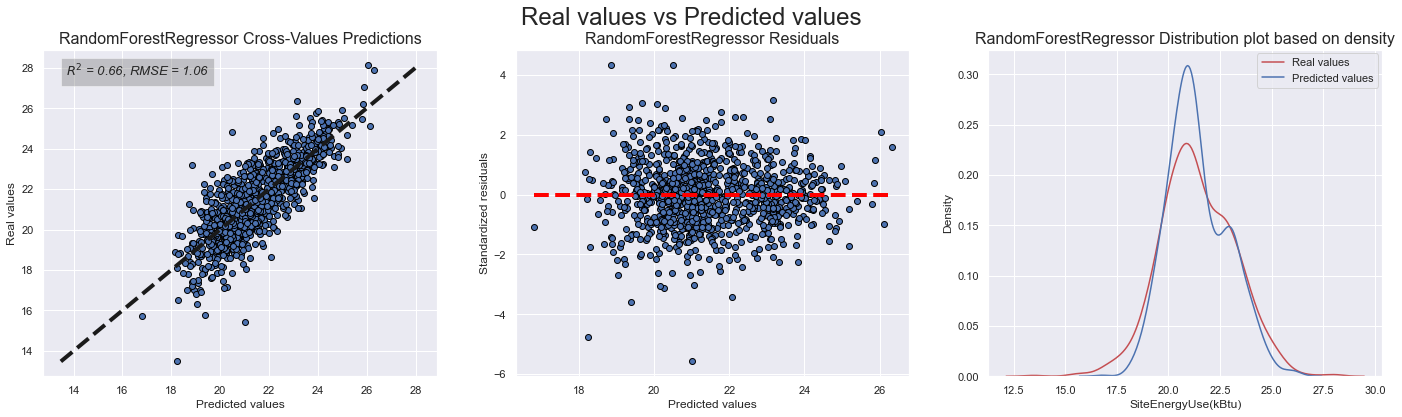

In [164]:
# Making the prediction using the testing data
plot_cross_val_predi(reg, "RandomForestRegressor", "SiteEnergyUse(kBtu)", X_train, y_train, cv=kfold)

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.5.4 Random Forest  Features Importance</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Features Importance</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> values</b>
</div>

In [165]:
reg = make_pipeline(preprocessor, RandomForestRegressor(max_depth=search.best_params_.get("randomforestregressor__max_depth"), 
                                                        max_features=search.best_params_.get("randomforestregressor__max_features"),
                                                        min_samples_leaf=search.best_params_.get("randomforestregressor__min_samples_leaf"), 
                                                        min_samples_split=search.best_params_.get("randomforestregressor__min_samples_split"),
                                                        n_estimators=search.best_params_.get("randomforestregressor__n_estimators"))
                   )

reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<function boolean_transformation at 0x0000020959AA2D30>))]),
                                                  ['NaturalGas', 'SteamUse',
                                                   'OtherFuelUse']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Neighborhoo...
                                                                   FunctionTransformer(func=<functio

<div class="alert alert-block alert-info">
    Plotting <b>the Features Importance</b> based on the best parameters
</div>

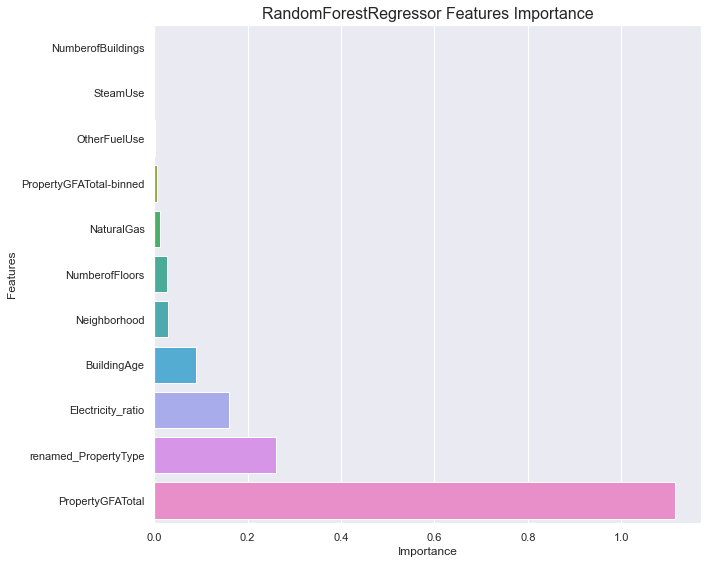

In [166]:
plot_features_importance(reg, "RandomForestRegressor", X_train, y_train, scoring="r2")

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.5.5 Predictions metrics</h4>
</div>

In [167]:
reg = make_pipeline(preprocessor, RandomForestRegressor(max_depth=search.best_params_.get("randomforestregressor__max_depth"), 
                                                        max_features=search.best_params_.get("randomforestregressor__max_features"),
                                                        min_samples_leaf=search.best_params_.get("randomforestregressor__min_samples_leaf"), 
                                                        min_samples_split=search.best_params_.get("randomforestregressor__min_samples_split"),
                                                        n_estimators=search.best_params_.get("randomforestregressor__n_estimators"))
                   )

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

<div class="alert alert-block alert-info">
    Adding the prediction to compare at the end
</div>

In [168]:
# Concatenating predictions to compare against y_test_transformed
df_temp = pd.DataFrame({
    "Model" : "Random Forest",
    "y_pred" : y_pred
})

In [169]:
# Concatenating predictions to compare against y_test_transformed
df_y_pred_hyperparameters = pd.concat([df_y_pred_hyperparameters, df_temp])

<div class="alert alert-block alert-info">
    Verifying the prediction model into the dataset
</div>

In [170]:
df_y_pred_hyperparameters["Model"].unique()

array(['Original', 'LinearRegression', 'KNeighbors', 'Lasso', 'SVR',
       'Random Forest'], dtype=object)

<div class="alert alert-block alert-info">
    Adding metrics to compare at the end
</div>

In [171]:
df_temp = pd.DataFrame({
    "Model" : ["Random Forest"],
    "1 - " + "R2".translate(SUP) : [R2SCORE], 
    "MAE" : [MAE],    
    "RMSE" : [RMSE],
    "Duration" : [end_time_model]
})

In [172]:
# Concatenating metrics to compare against model with default parameters
df_models_hyperparameters = pd.concat([df_models_hyperparameters, df_temp])

In [173]:
df_models_hyperparameters

,Model,1 - R²,MAE,RMSE,Duration
0,LinearRegression,0.34134,0.797,1.074,0.050
0,KNeighbors,0.37557,0.833,1.126,0.137
0,Lasso,0.35410,0.822,1.094,0.040
0,SVR,0.32585,0.773,1.049,0.218
0,Random Forest,0.32585,0.773,1.049,0.218


<div class="alert alert-block alert-success">
    Compared to the model with default parameters, we can see that the result is similar
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.6. Gradient Boosting optimization</h3>
</div>

<div class="alert alert-block alert-info">
    Initializing model
</div>

In [174]:
gbr = GradientBoostingRegressor()

<div class="alert alert-block alert-info">
    Data preprocessing based on the pipelines and the regressors setup
</div>

In [175]:
reg = make_pipeline(preprocessor, gbr)

<div class="alert alert-block alert-info">
    Identifying the names of each parameter
</div>

In [176]:
sorted(reg.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__functiontransformer',
 'columntransformer__pipeline-1__functiontransformer__accept_sparse',
 'columntransformer__pipeline-1__functiontransformer__check_inverse',
 'columntransformer__pipeline-1__functiontransformer__func',
 'columntransformer__pipeline-1__functiontransformer__inv_kw_args',
 'columntransformer__pipeline-1__functiontransformer__inverse_func',
 'columntransformer__pipeline-1__functiontransformer__kw_args',
 'columntransformer__pipeline-1__functiontransformer__validate',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__onehotencoder',
 'columntransformer__pipeline-2__onehotencoder__categories',
 'columntransformer__pipeline-2__onehotencoder__drop',
 'columntransformer__pipe

<div class="alert alert-block alert-info">
    Parameters settings
</div>

In [177]:
param_grid = {
    "gradientboostingregressor__learning_rate" : [0.01, 0.02, 0.03, 0.04], # Learning rate shrinks the contribution of each tree by learning_rate.
    "gradientboostingregressor__max_depth" : [2, 4, 6, 8], # Maximum depth of the individual regression estimators. 
    "gradientboostingregressor__n_estimators" : [100, 500, 1000, 1500], # The number of boosting stages to perform. 
    "gradientboostingregressor__subsample" : [0.9, 0.5, 0.2, 0.1] # The fraction of samples to be used for fitting the individual base learners.
}

<div class="alert alert-block alert-info">
    Executing the model
</div>

In [178]:
## K-Folds cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

search = GridSearchCV(reg, param_grid, n_jobs=-2, cv=kfold, scoring=SCORINGS, refit="R2", return_train_score=True)

search.fit(X_train, y_train)

# Transforming the result to dataframe format
df_results = pd.DataFrame(search.cv_results_)

# Get the results
print("Metrics based on the best R2".translate(SUP))
print("- 1 - " + "R2:".translate(SUP), round((1 - search.best_score_), 3))
print("- MAE:", round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3))
print("- RMSE:", round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3))
print("- Duration:", round(df_results.iloc[search.best_index_]["mean_score_time"], 3))
print("- Parameters:", search.best_params_)

Metrics based on the best R²
- 1 - R²: 0.317
- MAE: 0.769
- RMSE: 1.013
- Duration: 0.044
- Parameters: {'gradientboostingregressor__learning_rate': 0.01, 'gradientboostingregressor__max_depth': 4, 'gradientboostingregressor__n_estimators': 1000, 'gradientboostingregressor__subsample': 0.5}


<div class="alert alert-block alert-info">
    Adding metrics to compare at the end
</div>

In [179]:
df_temp = pd.DataFrame({
    "Model" : ["Gradient Boosting"],
    "1 - " + "R2".translate(SUP) : round((1 - search.best_score_), 3), 
    "MAE" : round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3),    
    "RMSE" : round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3),
    "Duration" : round(df_results.iloc[search.best_index_]["mean_score_time"], 3)
})

In [180]:
# Concatenating metrics to compare against model with default parameters
df_models_metrics_gsc = pd.concat([df_models_metrics_gsc, df_temp])

In [181]:
df_models_metrics_gsc

,Model,1 - R²,MAE,RMSE,Duration
0,LinearRegression,0.381,0.825,1.108,0.021
0,KNeighbors,0.377,0.833,1.111,0.057
0,Lasso,0.369,0.821,1.099,0.027
0,SVR,0.350,0.784,1.069,0.044
0,Random Forest,0.338,0.787,1.044,0.064
0,Gradient Boosting,0.317,0.769,1.013,0.044


In [182]:
df_models_metrics_gsc = pd.melt(df_models_metrics_gsc, id_vars="Model", var_name="Metric", value_name="Value")
df_models_metrics_gsc.head(3)

,Model,Metric,Value
0,LinearRegression,1 - R²,0.381
1,KNeighbors,1 - R²,0.377
2,Lasso,1 - R²,0.369


<div class="alert alert-block alert-success">
    We got the <b>best parameters</b> so, we are going to <b>analyze</b> them more in details 
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.6.1 Gradient Boosting Validation curve</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Validation curve</b>, we are going to use a <b>range of estimators</b> to analyze the model through them
</div>

In [183]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

n_estimators = np.arange(start=50, stop=650, step=50)

reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

<div class="alert alert-block alert-info">
    Plotting <b>the validacion curve</b> based on the best parameters
</div>

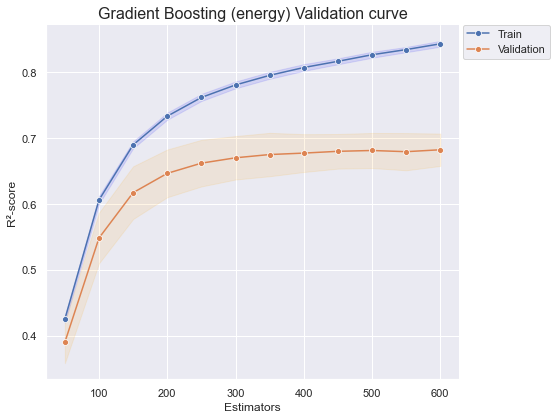

In [184]:
plot_validation_curve_by(reg, "Gradient Boosting (energy)", "R2SCORE", X_train, y_train, param_name="gradientboostingregressor__n_estimators", param_range=n_estimators, param_name_short="Estimators", cv=kfold)

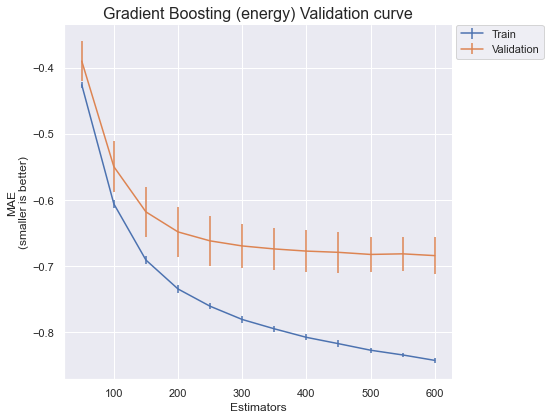

In [185]:
plot_validation_curve_by(reg, "Gradient Boosting (energy)", "MAE", X_train, y_train, param_name="gradientboostingregressor__n_estimators", param_range=n_estimators, param_name_short="Estimators", cv=kfold)

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.6.2 Gradient Boosting Learning curve</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Learning curve</b>, we are going to use the <b>best  parameters</b> to analyze the model
</div>

In [186]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

<div class="alert alert-block alert-info">
    Plotting <b>the learning curve</b> based on the best parameters
</div>

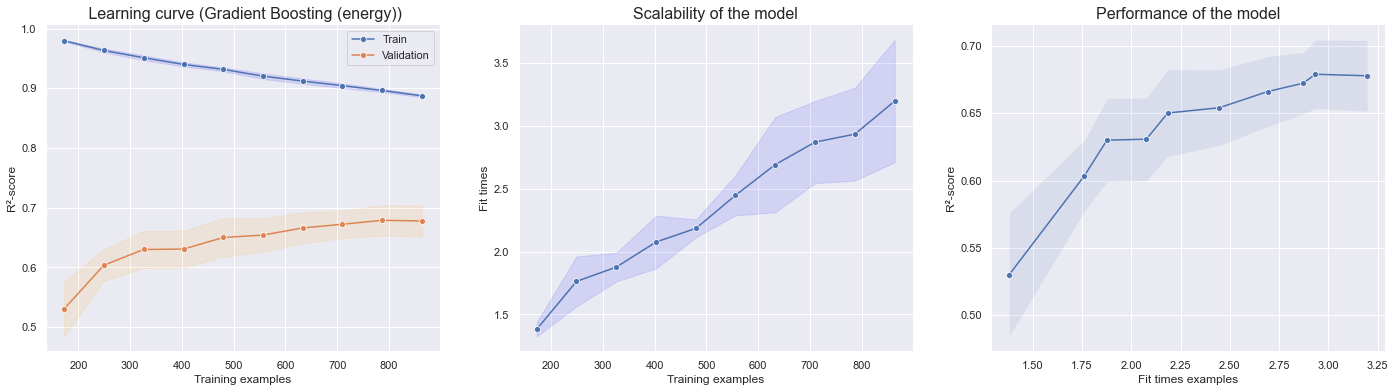

In [187]:
plot_learning_curve(reg, "Gradient Boosting (energy)", X_train, y_train, cv=kfold)

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.6.3 Gradient Boosting predictions validations</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>predictions validations</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> and <b>predicting</b> values</b>
</div>

In [188]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

<div class="alert alert-block alert-info">
    Plotting <b>the Cross-Validated Predictions</b> based on the best parameters for <b>training data</b>
</div>

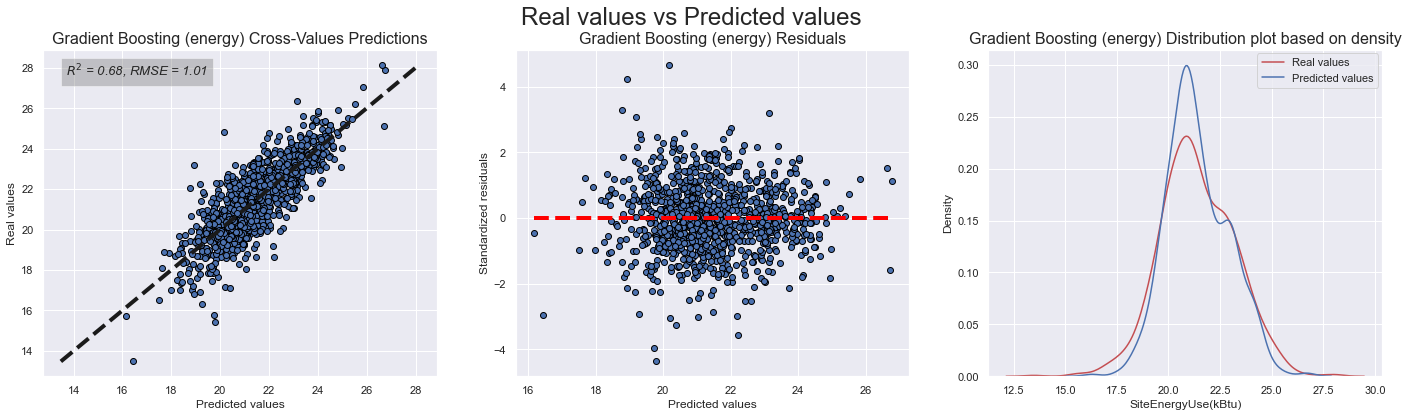

In [189]:
# Making the prediction using the testing data
plot_cross_val_predi(reg, "Gradient Boosting (energy)", "SiteEnergyUse(kBtu)", X_train, y_train, cv=kfold)

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.6.4 Gradient Boosting Features Importance</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Features Importance</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> values</b>
</div>

In [190]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<function boolean_transformation at 0x0000020959AA2D30>))]),
                                                  ['NaturalGas', 'SteamUse',
                                                   'OtherFuelUse']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Neighborhoo...
                                                                   FunctionTransformer(func=<functio

<div class="alert alert-block alert-info">
    Plotting <b>the Features Importance</b> based on the best parameters
</div>

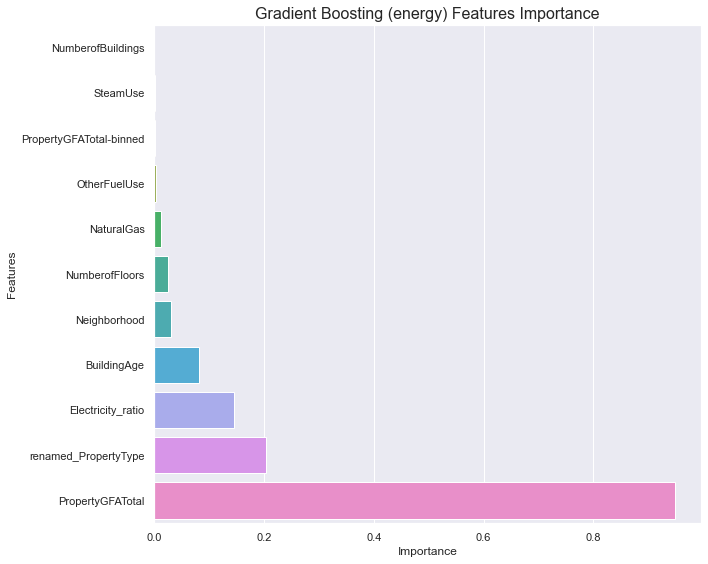

In [191]:
plot_features_importance(reg, "Gradient Boosting (energy)", X_train, y_train, scoring="r2")

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.6.5 Predictions metrics</h4>
</div>

<div class="alert alert-block alert-info">
    We are going to make the prediction with the testing set to compare the result with the model in default mode
</div>

In [192]:
start_time_model = timeit.default_timer()

reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

# Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
R2SCORE = round((1 - r2_score(y_test, y_pred)), 5)
    
# Calculating the Mean absolute error (The best value is 0.0)
MAE = round(mean_absolute_error(y_test, y_pred), 3)
    
# Calculating Root Mean Square Error for each model (The best value is 0.0)
RMSE = round(mean_squared_error(y_test, y_pred, squared=False), 3)

LIST_ENERGY = [R2SCORE, MAE, RMSE, end_time_model]

<div class="alert alert-block alert-info">
    Adding the prediction to compare at the end
</div>

In [193]:
# Concatenating predictions to compare against y_test_transformed
df_temp = pd.DataFrame({
    "Model" : "Gradient Boosting",
    "y_pred" : y_pred
})

In [194]:
# Concatenating predictions to compare against y_test_transformed
df_y_pred_hyperparameters = pd.concat([df_y_pred_hyperparameters, df_temp])

<div class="alert alert-block alert-info">
    Verifying the prediction model into the dataset
</div>

In [195]:
df_y_pred_hyperparameters["Model"].unique()

array(['Original', 'LinearRegression', 'KNeighbors', 'Lasso', 'SVR',
       'Random Forest', 'Gradient Boosting'], dtype=object)

<div class="alert alert-block alert-info">
    Adding metrics to compare at the end
</div>

In [196]:
df_temp = pd.DataFrame({
    "Model" : ["Gradient Boosting"],
    "1 - " + "R2".translate(SUP) : [R2SCORE], 
    "MAE" : [MAE],    
    "RMSE" : [RMSE],
    "Duration" : [end_time_model]
})

In [197]:
# Concatenating metrics to compare against model with default parameters
df_models_hyperparameters = pd.concat([df_models_hyperparameters, df_temp])

In [198]:
df_models_hyperparameters

,Model,1 - R²,MAE,RMSE,Duration
0,LinearRegression,0.34134,0.797,1.074,0.050
0,KNeighbors,0.37557,0.833,1.126,0.137
0,Lasso,0.35410,0.822,1.094,0.040
0,SVR,0.32585,0.773,1.049,0.218
0,Random Forest,0.32585,0.773,1.049,0.218
0,Gradient Boosting,0.31620,0.773,1.033,1.698


<div class="alert alert-block alert-success">
    Compared to the model with default parameters, we can see that the result is similar
</div>

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">7. Comparison metrics</h2>
</div>

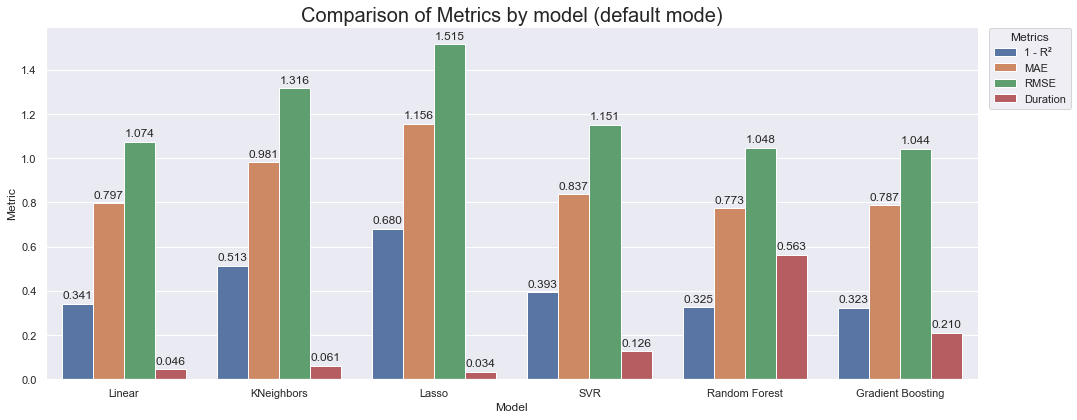

In [199]:
fig, ax1 = plt.subplots(figsize=(15, 6))
plot = sns.barplot(x="Model", y="Value", hue="Metric", data=df_models_metrics_melt, ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".3f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 8), textcoords="offset points")
plt.title("Comparison of Metrics by model (default mode)", size=20)
plt.legend(bbox_to_anchor=(1.10, 1), borderaxespad=0, title="Metrics")
plt.tight_layout()
plt.xlabel("Model", size=12)
plt.ylabel("Metric", size=12)
plt.savefig("img/comparisonMetricsByModel.png")
sns.despine(fig)

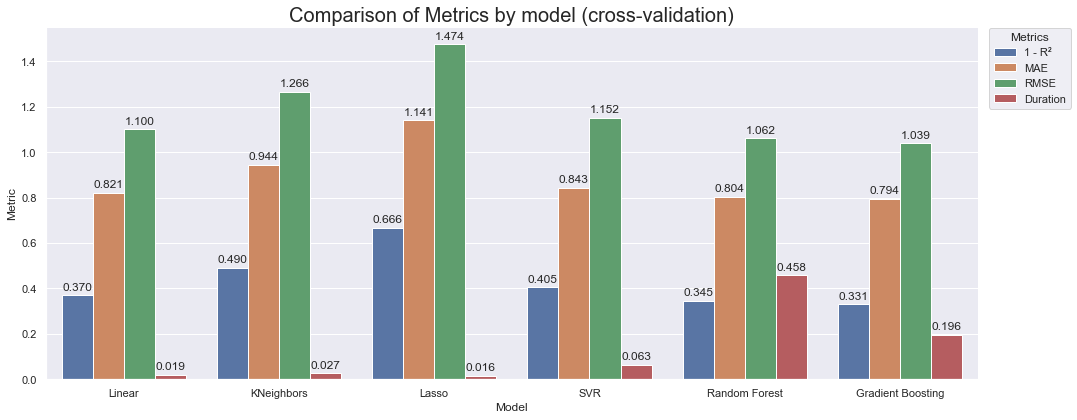

In [200]:
fig, ax1 = plt.subplots(figsize=(15, 6))
plot = sns.barplot(x="Model", y="Value", hue="Metric", data=df_models_metrics_melt_cross, ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".3f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 8), textcoords="offset points")
plt.title("Comparison of Metrics by model (cross-validation)", size=20)
plt.legend(bbox_to_anchor=(1.10, 1), borderaxespad=0, title="Metrics")
plt.tight_layout()
plt.xlabel("Model", size=12)
plt.ylabel("Metric", size=12)
plt.savefig("img/comparisonMetrics_crossByModel.png")
sns.despine(fig)

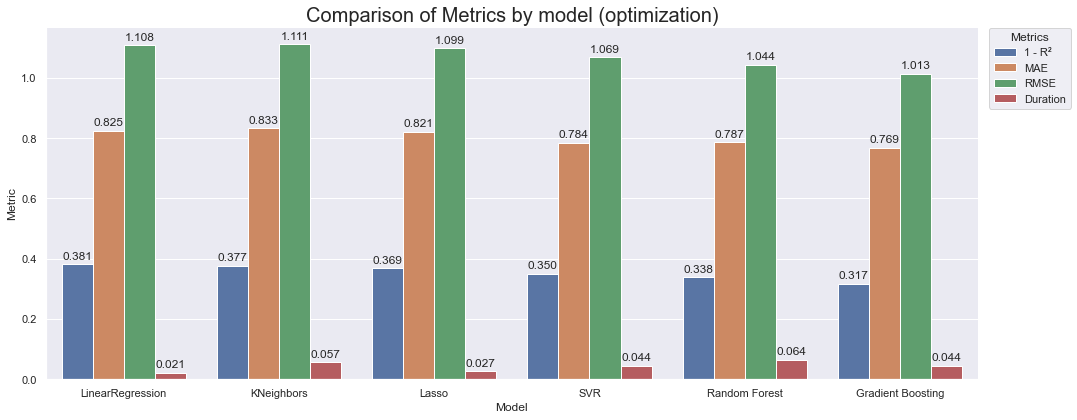

In [201]:
fig, ax1 = plt.subplots(figsize=(15, 6))
plot = sns.barplot(x="Model", y="Value", hue="Metric", data=df_models_metrics_gsc, ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".3f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 8), textcoords="offset points")
plt.title("Comparison of Metrics by model (optimization)", size=20)
plt.legend(bbox_to_anchor=(1.10, 1), borderaxespad=0, title="Metrics")
plt.tight_layout()
plt.xlabel("Model", size=12)
plt.ylabel("Metric", size=12)
plt.savefig("img/comparisonMetricsByModel-after-optimization.png")
sns.despine(fig)

<div class="alert alert-block alert-success">
    <b>Conclusions</b>
    <ul style="list-style-type: square;">
        <li><b>1-R2:</b> Gradient Boosting(0.31) </li>
        <li><b>MAE:</b> Gradient Boosting(0.754) </li>
        <li><b>RMSE:</b> Gradient Boosting(1.008) </li>
        <li><b>Duration:</b> Lasso(0.035) </li>
    </ul> 
    
    Based on the result, we are going to continue with <b>Gradient Boosting</b>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">7.1. Comparing with baseline</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Now, we are going to compare the result with a <b>dummy baseline</b> and the chance level</p>
    <p>First of all, we are going to run the cross-validate for the <b>Gradient Boosting Regressor</b>. </p>
</div>

In [202]:
cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)

In [203]:
reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5))

result_regressor = cross_validate(reg, X_train, y_train, cv=cv, scoring=("neg_mean_absolute_error"), n_jobs=-2)

errors_regressor = pd.Series(-result_regressor["test_score"], name="Regressor error")

<div class="alert alert-block alert-info">
    <p>Now, we run the cross-validate for the Dummy Regressor</p>
</div>

In [204]:
dummy = DummyRegressor()

result_dummy = cross_validate(dummy, X_train, y_train, cv=cv, scoring=("neg_mean_absolute_error"), n_jobs=-2)

errors_dummy = pd.Series(-result_dummy["test_score"], name="Dummy error")

<div class="alert alert-block alert-info">
    Evaluating the generalization performance of the second baseline
</div>

In [205]:
reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

score, permutation_score, pvalue = permutation_test_score(reg, X_train, y_train, cv=cv, scoring=("neg_mean_absolute_error"), n_jobs=-2, n_permutations=30)

errors_permutation = pd.Series(-permutation_score, name="Permuted error")

<div class="alert alert-block alert-info">
    Plotting the resultats
</div>

In [206]:
final_errors = pd.concat([errors_regressor, errors_dummy, errors_permutation], axis=1)

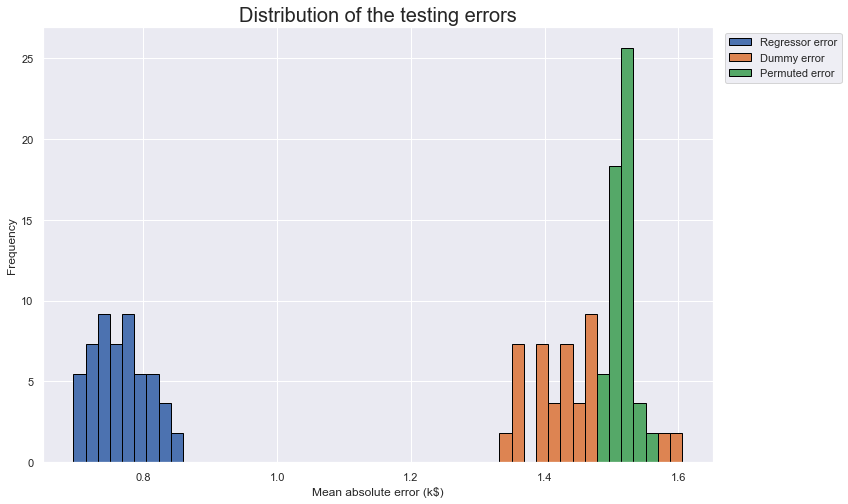

In [207]:
fig, ax1 = plt.subplots(figsize=(12, 8))
final_errors.plot.hist(bins=50, density=True, edgecolor="black", ax=ax1)
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left")
plt.xlabel("Mean absolute error (k$)")
plt.title("Distribution of the testing errors", size=20)
plt.savefig("img/comparison-with-baselines.png")

<div class="alert alert-block alert-success">
    <p><b>Conclusions</b></p>
    We can see that the performance of Gradient Boosting it is better than the two baselines. 

</div>

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">8. Splitting data - GHGEmissions(MetricTonsCO2e)</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">8.1. Splitting dataset based on the features and targets</h3>
</div>

<div class="alert alert-block alert-info">
    Splitting dataset based on the features and targets
</div>

In [208]:
X = data.drop(columns=["SiteEnergyUse(kBtu)", "GHGEmissions(MetricTonsCO2e)", "ENERGYSTARScore"])

In [209]:
X.head()

,NumberofFloors,NumberofBuildings,BuildingAge,PropertyGFATotal,PropertyGFATotal-binned,Neighborhood,renamed_PropertyType,Electricity_ratio,NaturalGas,SteamUse,OtherFuelUse
0,12.0,1.0,94.0,88434.0,Medium,DOWNTOWN,Hotel,52.79951,True,True,False
1,11.0,1.0,25.0,103566.0,Medium,DOWNTOWN,Hotel,46.74768,True,False,False
2,10.0,1.0,95.0,61320.0,Medium,DOWNTOWN,Hotel,9.80903,True,True,False
3,18.0,1.0,41.0,175580.0,Medium,DOWNTOWN,Hotel,40.90771,True,False,False
4,11.0,1.0,95.0,83008.0,Medium,DOWNTOWN,Hotel,42.85568,True,False,False


<div class="alert alert-block alert-info">
    Based on the Exploratory Data Analysis realized, we are going to transform to log2 the target variable
</div>

In [210]:
y_co2 = np.log2(data.loc[:,"GHGEmissions(MetricTonsCO2e)"])
y_co2.head()

0     7.962491
1     8.041714
2    10.919117
3     8.987832
4     7.703627
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

In [211]:
y_co2_values = y_co2.values
y_co2_values[:5]

array([ 7.96249118,  8.0417139 , 10.91911658,  8.98783245,  7.70362677])

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">8.2. Train/Test split</h3>
</div>

<div class="alert alert-block alert-info">
    At this point, we are going to predict <b>SiteEnergyUse(kBtu)</b>
</div>

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y_co2, test_size=0.33, random_state=42)

In [213]:
print("X_train: {}".format(X_train.shape))
print("y_train: {}".format(y_train.shape))
print("---------------------")
print("X_test: {}".format(X_test.shape))
print("y_test: {}".format(y_test.shape))

X_train: (1081, 11)
y_train: (1081,)
---------------------
X_test: (533, 11)
y_test: (533,)


<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">8.3. Predictions metrics</h3>
</div>

<div class="alert alert-block alert-info">
    We are going to make the prediction with the testing set to compare the result with the model in default mode
</div>

In [214]:
start_time_model = timeit.default_timer()

reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

# Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
R2SCORE = round((1 - r2_score(y_test, y_pred)), 5)
    
# Calculating the Mean absolute error (The best value is 0.0)
MAE = round(mean_absolute_error(y_test, y_pred), 3)
    
# Calculating Root Mean Square Error for each model (The best value is 0.0)
RMSE = round(mean_squared_error(y_test, y_pred, squared=False), 3)

LIST_CO2 = [R2SCORE, MAE, RMSE, end_time_model]

print("R2 =".translate(SUP), R2SCORE)
print("MAE =", MAE)
print("RMSE =", RMSE)
print("Duration =", end_time_model)

R² = 0.23485
MAE = 0.78
RMSE = 1.048
Duration = 2.394


<div class="alert alert-block alert-info">
    Adding results of predictions to compare before with others predictions
</div>

In [215]:
df_original_results_energy = pd.DataFrame({
    "Data" : ["Original", "Original", "Original", "Original"],
    "Metric" : ["1 - " + "R2".translate(SUP), "MAE", "RMSE", "Duration"],
    "Value" : LIST_ENERGY
})

df_original_results_energy

,Data,Metric,Value
0,Original,1 - R²,0.3162
1,Original,MAE,0.7730
2,Original,RMSE,1.0330
3,Original,Duration,1.6980


In [216]:
df_original_results_co2 = pd.DataFrame({
    "Data" : ["Original", "Original", "Original", "Original"],
    "Metric" : ["1 - " + "R2".translate(SUP), "MAE", "RMSE", "Duration"],
    "Value" : LIST_CO2
})

df_original_results_co2

,Data,Metric,Value
0,Original,1 - R²,0.23485
1,Original,MAE,0.78000
2,Original,RMSE,1.04800
3,Original,Duration,2.39400


<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">8.4. Gradient Boosting Validation curve</h3>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Validation curve</b>, we are going to use a <b>range of estimators</b> to analyze the model through them
</div>

In [217]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

n_estimators = np.arange(start=50, stop=650, step=50)

reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

<div class="alert alert-block alert-info">
    Plotting <b>the validacion curve</b> based on the best parameters
</div>

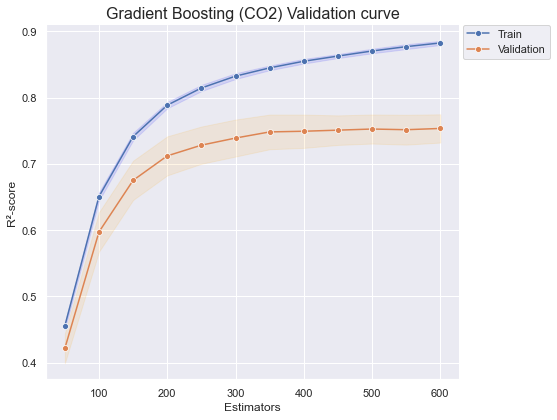

In [218]:
plot_validation_curve_by(reg, "Gradient Boosting (CO2)", "R2SCORE", X_train, y_train, param_name="gradientboostingregressor__n_estimators", param_range=n_estimators, param_name_short="Estimators", cv=kfold)

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">8.5. Gradient Boosting Learning curve</3>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Learning curve</b>, we are going to use the <b>best  parameters</b> to analyze the model
</div>

In [219]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

<div class="alert alert-block alert-info">
    Plotting <b>the learning curve</b> based on the best parameters
</div>

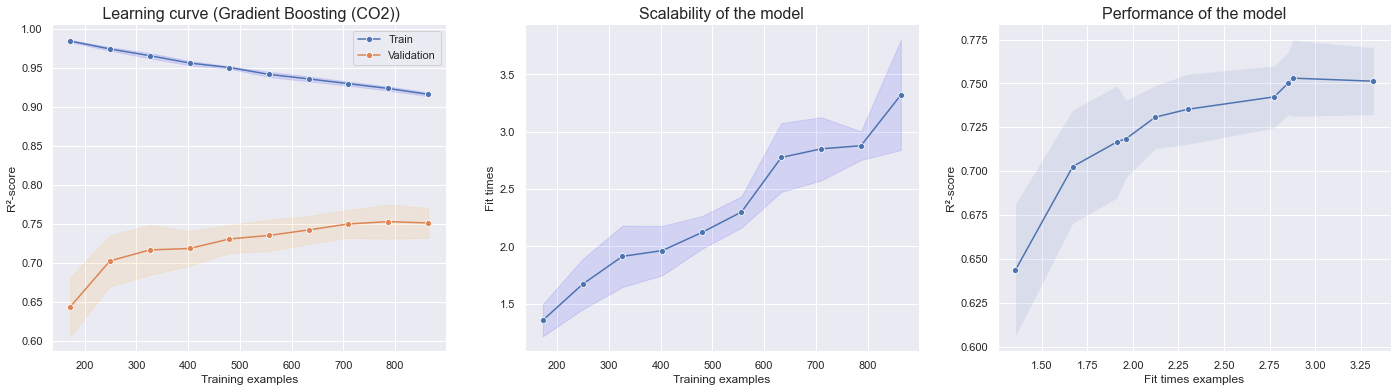

In [220]:
plot_learning_curve(reg, "Gradient Boosting (CO2)", X_train, y_train, cv=kfold)

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">8.6. Gradient Boosting predictions validations</h3>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>predictions validations</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> and <b>predicting</b> values</b>
</div>

In [221]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

<div class="alert alert-block alert-info">
    Plotting <b>the Cross-Validated Predictions</b> based on the best parameters for <b>training data</b>
</div>

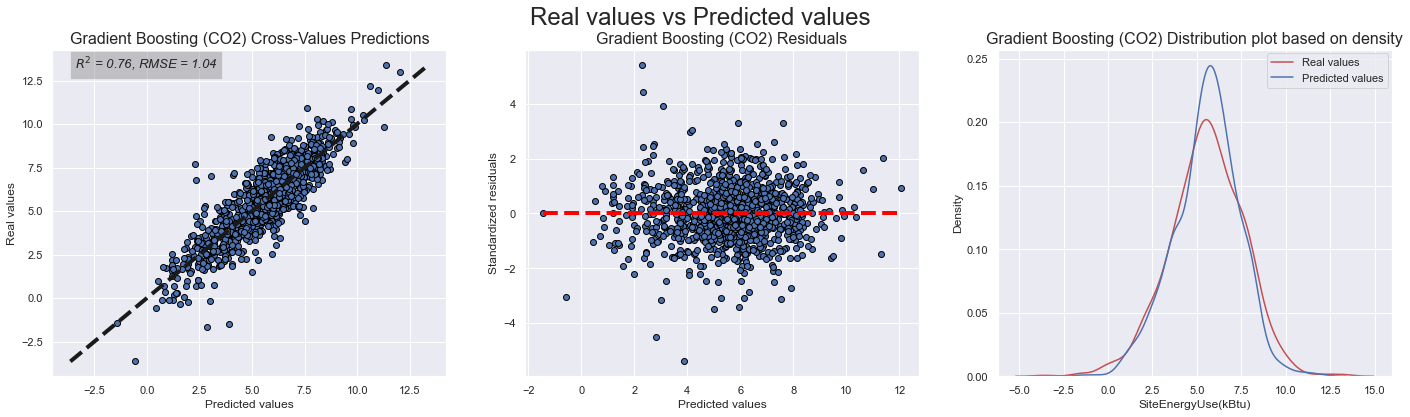

In [222]:
# Making the prediction using the testing data
plot_cross_val_predi(reg, "Gradient Boosting (CO2)", "GHGEmissions(MetricTonsCO2e)", X_train, y_train, cv=kfold)

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">8.7. Gradient Boosting Features Importance</h3>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Features Importance</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> values</b>
</div>

In [223]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<function boolean_transformation at 0x0000020959AA2D30>))]),
                                                  ['NaturalGas', 'SteamUse',
                                                   'OtherFuelUse']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Neighborhoo...
                                                                   FunctionTransformer(func=<functio

<div class="alert alert-block alert-info">
    Plotting <b>the Features Importance</b> based on the best parameters
</div>

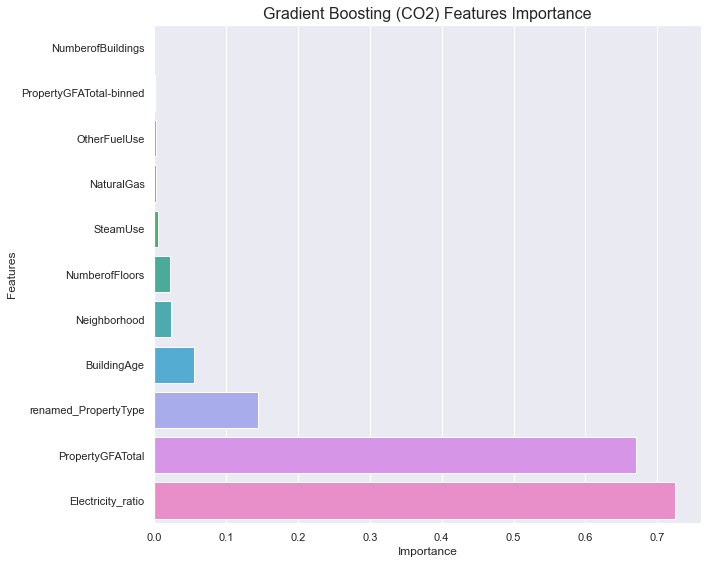

In [224]:
plot_features_importance(reg, "Gradient Boosting (CO2)", X_train, y_train, scoring="r2")

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">9. PCA - Predictions</h2>
</div>

<div class="alert alert-block alert-info">
    So far, we got the best result through Gradient Boosting. Now, we are going to test the same model with the PCA results
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">9.1. Importing and preparing files</h3>
</div>

In [225]:
data_pca = pd.read_csv(r"datasets\df_PCA.csv")

In [226]:
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e)
0,2.219189,1.968990,-3.224799,0.514252,0.466900,-0.891532,-1.575095,-0.796569,22.735091,7.968264
1,1.761093,1.428240,0.154642,-0.427552,-0.401691,-0.062767,0.841791,-0.804658,22.994076,8.047178
2,1.388044,2.989048,-3.317794,0.603832,0.414441,-0.860050,-1.738531,-0.974545,24.750691,10.919861
3,2.797948,1.774751,-0.410030,-0.620678,-0.456326,-0.237572,0.824223,-0.214634,23.821928,8.990671
4,1.184820,1.609804,-1.132326,-0.646658,0.008407,-0.402223,0.973678,0.695133,22.576081,7.710531


<div class="alert alert-block alert-info">
    It is not necessary to make any preprocessing on data
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">9.2. Splitting dataset based on the features and targets</h3>
</div>

<div class="alert alert-block alert-info">
    Splitting dataset based on the features and targets
</div>

In [227]:
X = data_pca.drop(columns=["SiteEnergyUse(kBtu)", "GHGEmissions(MetricTonsCO2e)"])

In [228]:
X.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.219189,1.968990,-3.224799,0.514252,0.466900,-0.891532,-1.575095,-0.796569
1,1.761093,1.428240,0.154642,-0.427552,-0.401691,-0.062767,0.841791,-0.804658
2,1.388044,2.989048,-3.317794,0.603832,0.414441,-0.860050,-1.738531,-0.974545
3,2.797948,1.774751,-0.410030,-0.620678,-0.456326,-0.237572,0.824223,-0.214634
4,1.184820,1.609804,-1.132326,-0.646658,0.008407,-0.402223,0.973678,0.695133


In [229]:
y_energy = data_pca.loc[:,"SiteEnergyUse(kBtu)"]
y_energy.head()

0    22.735091
1    22.994076
2    24.750691
3    23.821928
4    22.576081
Name: SiteEnergyUse(kBtu), dtype: float64

In [230]:
y_co2 = data_pca.loc[:,"GHGEmissions(MetricTonsCO2e)"]
y_co2.head()

0     7.968264
1     8.047178
2    10.919861
3     8.990671
4     7.710531
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">9.3. Predictions metrics - SiteEnergyUse(kBtu)</h3>
</div>

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y_energy, test_size=0.33, random_state=42)

start_time_model = timeit.default_timer()

reg = GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                subsample=search.best_params_.get("gradientboostingregressor__subsample"))

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

# Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
R2SCORE = round((1 - r2_score(y_test, y_pred)), 5)
    
# Calculating the Mean absolute error (The best value is 0.0)
MAE = round(mean_absolute_error(y_test, y_pred), 3)
    
# Calculating Root Mean Square Error for each model (The best value is 0.0)
RMSE = round(mean_squared_error(y_test, y_pred, squared=False), 3)

LIST_ENERGY_PCA = [R2SCORE, MAE, RMSE, end_time_model]

print("R2 =".translate(SUP), R2SCORE)
print("MAE =", MAE)
print("RMSE =", RMSE)
print("Duration =", end_time_model)

R² = 0.36689
MAE = 0.834
RMSE = 1.113
Duration = 2.738


<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">9.3. Predictions metrics - GHGEmissions(MetricTonsCO2e)</h3>
</div>

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y_co2, test_size=0.33, random_state=42)

start_time_model = timeit.default_timer()

reg = GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                subsample=search.best_params_.get("gradientboostingregressor__subsample"))

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

# Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
R2SCORE = round((1 - r2_score(y_test, y_pred)), 5)
    
# Calculating the Mean absolute error (The best value is 0.0)
MAE = round(mean_absolute_error(y_test, y_pred), 3)
    
# Calculating Root Mean Square Error for each model (The best value is 0.0)
RMSE = round(mean_squared_error(y_test, y_pred, squared=False), 3)

LIST_CO2_PCA = [R2SCORE, MAE, RMSE, end_time_model]

print("R2 =".translate(SUP), R2SCORE)
print("MAE =", MAE)
print("RMSE =", RMSE)
print("Duration =", end_time_model)

R² = 0.27304
MAE = 0.812
RMSE = 1.057
Duration = 2.353


<div class="alert alert-block alert-info">
    Adding results of predictions to compare before with others predictions
</div>

In [233]:
df_PCA_results_energy = pd.DataFrame({
    "Data" : ["PCA", "PCA", "PCA", "PCA"],
    "Metric" : ["1 - " + "R2".translate(SUP), "MAE", "RMSE", "Duration"],
    "Value" : LIST_ENERGY_PCA
})

df_PCA_results_energy

,Data,Metric,Value
0,PCA,1 - R²,0.36689
1,PCA,MAE,0.83400
2,PCA,RMSE,1.11300
3,PCA,Duration,2.73800


In [234]:
df_PCA_results_co2 = pd.DataFrame({
    "Data" : ["PCA", "PCA", "PCA", "PCA"],
    "Metric" : ["1 - " + "R2".translate(SUP), "MAE", "RMSE", "Duration"],
    "Value" : LIST_CO2_PCA
})

df_PCA_results_co2

,Data,Metric,Value
0,PCA,1 - R²,0.27304
1,PCA,MAE,0.81200
2,PCA,RMSE,1.05700
3,PCA,Duration,2.35300


<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">10. Reductions de features</h2>
</div>

<div class="alert alert-block alert-info">
    Now, we are going to reduce the features to make the predictions based on Gradient Boosting
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">10.1. Splitting dataset based on the features and targets</h3>
</div>

<div class="alert alert-block alert-info">
    Splitting dataset based on the features and targets
</div>

In [235]:
X = data.drop(columns=["SiteEnergyUse(kBtu)", "GHGEmissions(MetricTonsCO2e)", "ENERGYSTARScore", "NumberofBuildings", "PropertyGFATotal-binned", "SteamUse", "OtherFuelUse"])

In [236]:
X.head()

,NumberofFloors,BuildingAge,PropertyGFATotal,Neighborhood,renamed_PropertyType,Electricity_ratio,NaturalGas
0,12.0,94.0,88434.0,DOWNTOWN,Hotel,52.79951,True
1,11.0,25.0,103566.0,DOWNTOWN,Hotel,46.74768,True
2,10.0,95.0,61320.0,DOWNTOWN,Hotel,9.80903,True
3,18.0,41.0,175580.0,DOWNTOWN,Hotel,40.90771,True
4,11.0,95.0,83008.0,DOWNTOWN,Hotel,42.85568,True


<div class="alert alert-block alert-info">
    Based on the Exploratory Data Analysis realized, we are going to transform to log2 the target variable
</div>

In [237]:
y_energy = np.log2(data.loc[:,"SiteEnergyUse(kBtu)"])
y_energy.head()

0    22.735091
1    22.994076
2    24.750691
3    23.821928
4    22.576081
Name: SiteEnergyUse(kBtu), dtype: float64

In [238]:
y_co2 = np.log2(data.loc[:,"GHGEmissions(MetricTonsCO2e)"])
y_co2.head()

0     7.962491
1     8.041714
2    10.919117
3     8.987832
4     7.703627
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">10.2. Data preprocessing</h3>
</div>

<div class="alert alert-block alert-info">
    Updating the data preprocessing based on the features selected
</div>

In [239]:
BOOLEAN_FEATURES = ["NaturalGas"] # Features to be transformed into int
CATEGORICAL_FEATURES = ["Neighborhood", "renamed_PropertyType"] # Features to be transformed with OneHotEncoder()
FEATURES_TO_LOG = ["PropertyGFATotal"] # Features to be transformed into log2
NUMERICAL_FEATURES = ["NumberofFloors", "BuildingAge", "PropertyGFATotal", "Electricity_ratio"] # Features to be treated considering numerical values

In [240]:
boolean_pipeline = make_pipeline(FunctionTransformer(boolean_transformation))

categorical_pipeline = make_pipeline(OneHotEncoder(sparse=False, drop="first"))

log_transformation_pipeline = make_pipeline(KNNImputer(), FunctionTransformer(log_transformation))

numerical_pipeline = make_pipeline(KNNImputer(), StandardScaler())

In [241]:
preprocessor = make_column_transformer(
                (boolean_pipeline, BOOLEAN_FEATURES), 
                (categorical_pipeline, CATEGORICAL_FEATURES),
                (log_transformation_pipeline, FEATURES_TO_LOG), 
                (numerical_pipeline, NUMERICAL_FEATURES)
)

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">10.3. Predictions metrics - SiteEnergyUse(kBtu)</h3>
</div>

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y_energy, test_size=0.33, random_state=42)

start_time_model = timeit.default_timer()

reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

# Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
R2SCORE = round((1 - r2_score(y_test, y_pred)), 5)
    
# Calculating the Mean absolute error (The best value is 0.0)
MAE = round(mean_absolute_error(y_test, y_pred), 3)
    
# Calculating Root Mean Square Error for each model (The best value is 0.0)
RMSE = round(mean_squared_error(y_test, y_pred, squared=False), 3)

LIST_ENERGY_REDUCED_FEATURES = [R2SCORE, MAE, RMSE, end_time_model]

print("R2 =".translate(SUP), R2SCORE)
print("MAE =", MAE)
print("RMSE =", RMSE)
print("Duration =", end_time_model)

R² = 0.32467
MAE = 0.781
RMSE = 1.047
Duration = 2.125


<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">10.4. Predictions metrics - GHGEmissions(MetricTonsCO2e)</h3>
</div>

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y_co2, test_size=0.33, random_state=42)

start_time_model = timeit.default_timer()


reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

# Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
R2SCORE = round((1 - r2_score(y_test, y_pred)), 5)
    
# Calculating the Mean absolute error (The best value is 0.0)
MAE = round(mean_absolute_error(y_test, y_pred), 3)
    
# Calculating Root Mean Square Error for each model (The best value is 0.0)
RMSE = round(mean_squared_error(y_test, y_pred, squared=False), 3)

LIST_CO2_REDUCED_FEATURES = [R2SCORE, MAE, RMSE, end_time_model]

print("R2 =".translate(SUP), R2SCORE)
print("MAE =", MAE)
print("RMSE =", RMSE)
print("Duration =", end_time_model)

R² = 0.2398
MAE = 0.788
RMSE = 1.059
Duration = 2.014


<div class="alert alert-block alert-info">
    Adding results of predictions to compare before with others predictions
</div>

In [244]:
df_FEATURES_REDUCED_results_energy = pd.DataFrame({
    "Data" : ["Reduced", "Reduced", "Reduced", "Reduced"],
    "Metric" : ["1 - " + "R2".translate(SUP), "MAE", "RMSE", "Duration"],
    "Value" : LIST_ENERGY_REDUCED_FEATURES
})

df_FEATURES_REDUCED_results_energy

,Data,Metric,Value
0,Reduced,1 - R²,0.32467
1,Reduced,MAE,0.78100
2,Reduced,RMSE,1.04700
3,Reduced,Duration,2.12500


In [245]:
df_FEATURES_REDUCED_results_co2 = pd.DataFrame({
    "Data" : ["Reduced", "Reduced", "Reduced", "Reduced"],
    "Metric" : ["1 - " + "R2".translate(SUP), "MAE", "RMSE", "Duration"],
    "Value" : LIST_CO2_REDUCED_FEATURES
})

df_FEATURES_REDUCED_results_co2

,Data,Metric,Value
0,Reduced,1 - R²,0.2398
1,Reduced,MAE,0.7880
2,Reduced,RMSE,1.0590
3,Reduced,Duration,2.0140


<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">11. Comparison of predictions</h2>
</div>

In [246]:
df_final_energy = pd.concat([df_original_results_energy, df_PCA_results_energy, df_FEATURES_REDUCED_results_energy], axis=0)

In [247]:
df_final_co2 = pd.concat([df_original_results_co2, df_PCA_results_co2, df_FEATURES_REDUCED_results_co2], axis=0)

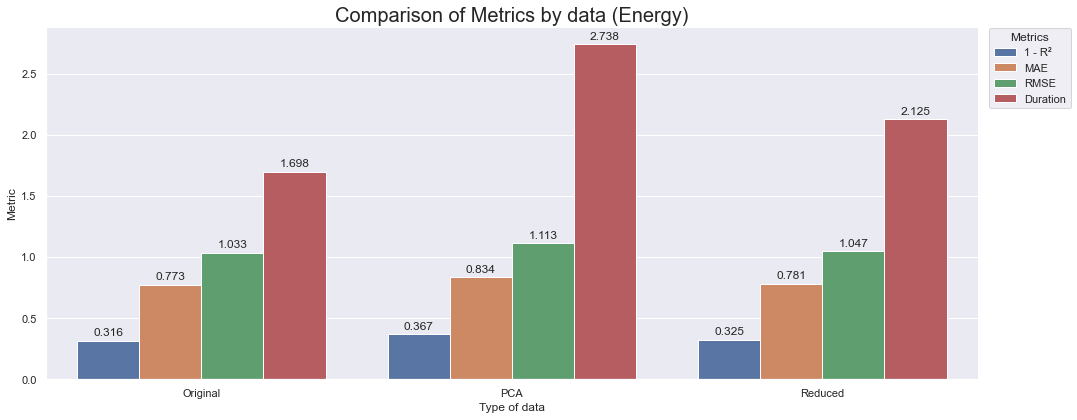

In [248]:
fig, ax1 = plt.subplots(figsize=(15, 6))
plot = sns.barplot(x="Data", y="Value", hue="Metric", data=df_final_energy, ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".3f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 8), textcoords="offset points")
plt.title("Comparison of Metrics by data (Energy)", size=20)
plt.legend(bbox_to_anchor=(1.10, 1), borderaxespad=0, title="Metrics")
plt.tight_layout()
plt.xlabel("Type of data", size=12)
plt.ylabel("Metric", size=12)
plt.savefig("img/comparisonMetricsByData-Energy.png")
sns.despine(fig)

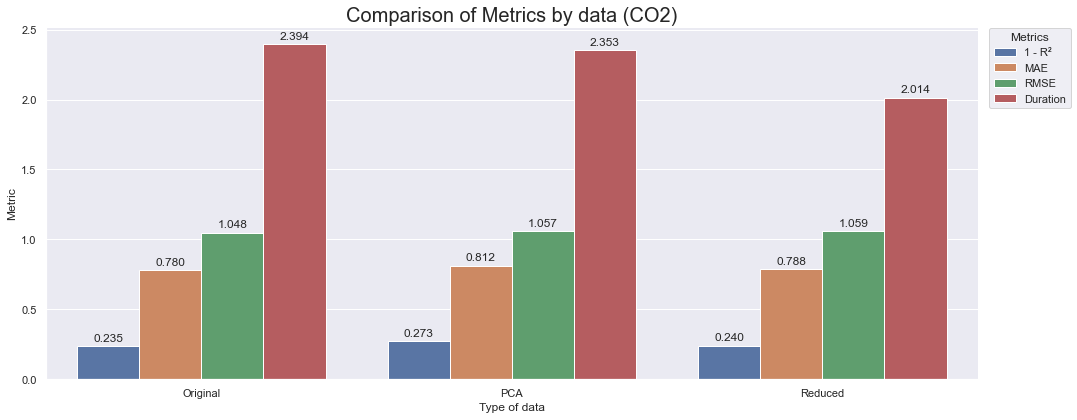

In [249]:
fig, ax1 = plt.subplots(figsize=(15, 6))
plot = sns.barplot(x="Data", y="Value", hue="Metric", data=df_final_co2, ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".3f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 8), textcoords="offset points")
plt.title("Comparison of Metrics by data (CO2)", size=20)
plt.legend(bbox_to_anchor=(1.10, 1), borderaxespad=0, title="Metrics")
plt.tight_layout()
plt.xlabel("Type of data", size=12)
plt.ylabel("Metric", size=12)
plt.savefig("img/comparisonMetricsByData-Co2.png")
sns.despine(fig)

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">12. Importance of ENERGYSTARScore in dataset reduced</h2>
</div>

<div class="alert alert-block alert-info">
    Now, we are going to identify the importance of ENERGYSTARScore for the predictions
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">12.1. Splitting dataset based on the features and targets</h3>
</div>

In [289]:
df_energy_star_score = data.drop(columns=["NumberofBuildings", "PropertyGFATotal-binned", "SteamUse", "OtherFuelUse"])

In [290]:
df_analysis(df_energy_star_score, "df_energy_star_score", type_analysis="complete")


Analysis of df_energy_star_score dataset
--------------------------------------------------------------------
- Dataset shape:                  1614 rows and 10 columns
- Total of NaN values:            568
- Percentage of NaN:              3.52 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 115.2+ KB )
--------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
1,BuildingAge,float64,1614,113,0,0.00000,59.44796,6.00000,32.00000,56.00000,91.00000,121.00000,32.75537
3,Neighborhood,object,1614,13,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,renamed_PropertyType,object,1614,8,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaturalGas,bool,1614,2,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,SiteEnergyUse(kBtu),float64,1614,1613,0,0.00000,6301646.01963,11441.00000,1188142.75000,2397995.50000,6499306.00000,295812640.00000,13693695.87053
8,GHGEmissions(MetricTonsCO2e),float64,1614,1541,0,0.00000,134.64926,0.08000,19.08000,47.22000,131.02750,10780.64000,422.52765
5,Electricity_ratio,float64,1608,1251,6,0.37000,70.98046,0.00033,50.85902,72.61001,100.00326,100.00874,25.74438
2,PropertyGFATotal,float64,1605,1527,9,0.56000,91161.60436,11285.00000,28844.00000,47602.00000,98220.00000,1158691.00000,115527.56070
0,NumberofFloors,float64,1585,28,29,1.80000,3.44606,1.00000,1.00000,2.00000,4.00000,33.00000,3.79091
9,ENERGYSTARScore,float64,1090,100,524,32.47000,64.59725,1.00000,47.00000,72.00000,88.00000,100.00000,28.49339


<div class="alert alert-block alert-info">
    Here, we have a problem, there are 524 missing-values in <b>ENERGYSTARScore</b>. So, we are going to delete them to see how many samples left
</div>

In [291]:
df_energy_star_score = pd.DataFrame(df_energy_star_score[df_energy_star_score["ENERGYSTARScore"].notnull()]).reset_index(drop=True)

In [292]:
df_analysis(df_energy_star_score, "df_energy_star_score", type_analysis="complete")


Analysis of df_energy_star_score dataset
--------------------------------------------------------------------
- Dataset shape:                  1090 rows and 10 columns
- Total of NaN values:            32
- Percentage of NaN:              0.29 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 77.8+ KB )
--------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
1,BuildingAge,float64,1090,111,0,0.00000,57.61193,6.00000,32.00000,54.00000,83.00000,121.00000,31.81666
3,Neighborhood,object,1090,13,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,renamed_PropertyType,object,1090,8,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaturalGas,bool,1090,2,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,SiteEnergyUse(kBtu),float64,1090,1089,0,0.00000,6347338.63612,43943.00000,1260020.50000,2466558.50000,6855845.75000,295812640.00000,14978095.14688
8,GHGEmissions(MetricTonsCO2e),float64,1090,1057,0,0.00000,133.62130,0.31000,18.91500,46.41000,127.71500,10780.64000,485.26035
9,ENERGYSTARScore,float64,1090,100,0,0.00000,64.59725,1.00000,47.00000,72.00000,88.00000,100.00000,28.49339
5,Electricity_ratio,float64,1085,830,5,0.46000,72.71674,0.52808,53.12373,76.16158,100.00407,100.00455,25.72612
2,PropertyGFATotal,float64,1084,1056,6,0.55000,100479.94465,12294.00000,31986.25000,52611.00000,110546.25000,1158691.00000,125528.79064
0,NumberofFloors,float64,1069,28,21,1.93000,3.85126,1.00000,1.00000,2.00000,4.00000,33.00000,4.34377


<div class="alert alert-block alert-info">
    1090 samples remained. So, let's go to Split dataset based on the features and targets
</div>

In [293]:
X = df_energy_star_score.drop(columns=["SiteEnergyUse(kBtu)", "GHGEmissions(MetricTonsCO2e)"])

In [294]:
X.head()

,NumberofFloors,BuildingAge,PropertyGFATotal,Neighborhood,renamed_PropertyType,Electricity_ratio,NaturalGas,ENERGYSTARScore
0,12.0,94.0,88434.0,DOWNTOWN,Hotel,52.79951,True,65.0
1,11.0,25.0,103566.0,DOWNTOWN,Hotel,46.74768,True,51.0
2,10.0,95.0,61320.0,DOWNTOWN,Hotel,9.80903,True,1.0
3,18.0,41.0,175580.0,DOWNTOWN,Hotel,40.90771,True,67.0
4,11.0,95.0,83008.0,DOWNTOWN,Hotel,42.85568,True,25.0


<div class="alert alert-block alert-info">
    Based on the Exploratory Data Analysis realized, we are going to transform to log2 the target variable
</div>

In [295]:
y_energy = np.log2(df_energy_star_score.loc[:,"SiteEnergyUse(kBtu)"])
y_energy.head()

0    22.735091
1    22.994076
2    24.750691
3    23.821928
4    22.576081
Name: SiteEnergyUse(kBtu), dtype: float64

In [296]:
y_co2 = np.log2(df_energy_star_score.loc[:,"GHGEmissions(MetricTonsCO2e)"])
y_co2.head()

0     7.962491
1     8.041714
2    10.919117
3     8.987832
4     7.703627
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">12.2. Data preprocessing</h3>
</div>

<div class="alert alert-block alert-info">
    Updating the data preprocessing based on the features selected
</div>

In [297]:
BOOLEAN_FEATURES = ["NaturalGas"] # Features to be transformed into int
CATEGORICAL_FEATURES = ["Neighborhood", "renamed_PropertyType"] # Features to be transformed with OneHotEncoder()
FEATURES_TO_LOG = ["PropertyGFATotal"] # Features to be transformed into log2
NUMERICAL_FEATURES = ["NumberofFloors", "BuildingAge", "PropertyGFATotal", "Electricity_ratio", "ENERGYSTARScore"] # Features to be treated considering numerical values

In [298]:
boolean_pipeline = make_pipeline(FunctionTransformer(boolean_transformation))

categorical_pipeline = make_pipeline(OneHotEncoder(sparse=False, drop="first"))

log_transformation_pipeline = make_pipeline(KNNImputer(), FunctionTransformer(log_transformation))

numerical_pipeline = make_pipeline(KNNImputer(), StandardScaler())

In [299]:
preprocessor = make_column_transformer(
                (boolean_pipeline, BOOLEAN_FEATURES), 
                (categorical_pipeline, CATEGORICAL_FEATURES),
                (log_transformation_pipeline, FEATURES_TO_LOG), 
                (numerical_pipeline, NUMERICAL_FEATURES)
)

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">12.4. Predictions - SiteEnergyUse(kBtu)</h3>
</div>

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y_energy, test_size=0.33, random_state=42)

start_time_model = timeit.default_timer()

reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

# Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
R2SCORE = round((1 - r2_score(y_test, y_pred)), 5)
    
# Calculating the Mean absolute error (The best value is 0.0)
MAE = round(mean_absolute_error(y_test, y_pred), 3)
    
# Calculating Root Mean Square Error for each model (The best value is 0.0)
RMSE = round(mean_squared_error(y_test, y_pred, squared=False), 3)

LIST_ENERGY_REDUCED_ENERGYSTARSCORE_FEATURES = [R2SCORE, MAE, RMSE, end_time_model]

print("R2 =".translate(SUP), R2SCORE)
print("MAE =", MAE)
print("RMSE =", RMSE)
print("Duration =", end_time_model)

R² = 0.13446
MAE = 0.457
RMSE = 0.628
Duration = 1.13


<div class="alert alert-block alert-info">
    Adding results of predictions to compare before with others predictions
</div>

In [301]:
df_ENERGY_REDUCED_ENERGYSTARSCORE_FEATURES = pd.DataFrame({
    "Target" : ["Energy", "Energy", "Energy", "Energy"],
    "Metric" : ["1 - " + "R2".translate(SUP), "MAE", "RMSE", "Duration"],
    "Value" : LIST_ENERGY_REDUCED_ENERGYSTARSCORE_FEATURES
})

df_ENERGY_REDUCED_ENERGYSTARSCORE_FEATURES

,Target,Metric,Value
0,Energy,1 - R²,0.13446
1,Energy,MAE,0.45700
2,Energy,RMSE,0.62800
3,Energy,Duration,1.13000


<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">12.4.1 Features Importance - SiteEnergyUse(kBtu)</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Features Importance</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> values</b>
</div>

In [302]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<function boolean_transformation at 0x0000020959AA2D30>))]),
                                                  ['NaturalGas']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Neighborhood',
                                                   'renamed_PropertyType']...
                                                                   FunctionTransformer(func=<function

<div class="alert alert-block alert-info">
    Plotting <b>the Features Importance</b> based on the best parameters
</div>

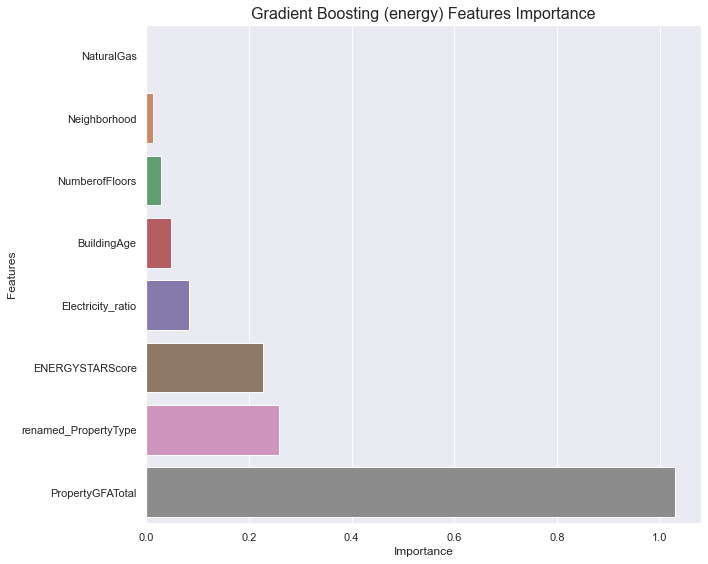

In [303]:
plot_features_importance(reg, "Gradient Boosting (energy)", X_train, y_train, scoring="r2")

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">12.5. Predictions - GHGEmissions(MetricTonsCO2e)</h3>
</div>

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y_co2, test_size=0.33, random_state=42)

start_time_model = timeit.default_timer()


reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

# Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
R2SCORE = round((1 - r2_score(y_test, y_pred)), 5)
    
# Calculating the Mean absolute error (The best value is 0.0)
MAE = round(mean_absolute_error(y_test, y_pred), 3)
    
# Calculating Root Mean Square Error for each model (The best value is 0.0)
RMSE = round(mean_squared_error(y_test, y_pred, squared=False), 3)

LIST_CO2_REDUCED_ENERGYSTARSCORE_FEATURES = [R2SCORE, MAE, RMSE, end_time_model]

print("R2 =".translate(SUP), R2SCORE)
print("MAE =", MAE)
print("RMSE =", RMSE)
print("Duration =", end_time_model)

R² = 0.12733
MAE = 0.499
RMSE = 0.706
Duration = 1.018


<div class="alert alert-block alert-info">
    Adding results of predictions to compare before with others predictions
</div>

In [305]:
df_CO2_REDUCED_ENERGYSTARSCORE_FEATURES = pd.DataFrame({
    "Target" : ["CO2", "CO2", "CO2", "CO2"],
    "Metric" : ["1 - " + "R2".translate(SUP), "MAE", "RMSE", "Duration"],
    "Value" : LIST_CO2_REDUCED_ENERGYSTARSCORE_FEATURES
})

df_CO2_REDUCED_ENERGYSTARSCORE_FEATURES

,Target,Metric,Value
0,CO2,1 - R²,0.12733
1,CO2,MAE,0.49900
2,CO2,RMSE,0.70600
3,CO2,Duration,1.01800


<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">12.5.1 Features Importance - GHGEmissions(MetricTonsCO2e)</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Features Importance</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> values</b>
</div>

In [306]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<function boolean_transformation at 0x0000020959AA2D30>))]),
                                                  ['NaturalGas']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Neighborhood',
                                                   'renamed_PropertyType']...
                                                                   FunctionTransformer(func=<function

<div class="alert alert-block alert-info">
    Plotting <b>the Features Importance</b> based on the best parameters
</div>

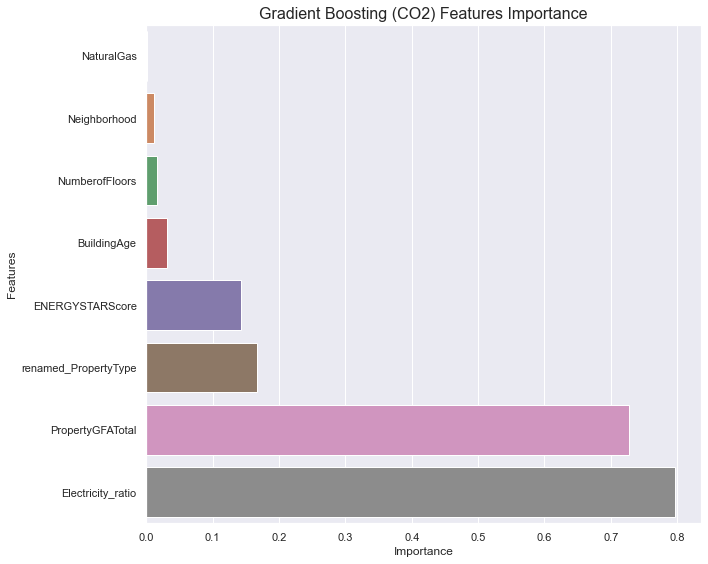

In [307]:
plot_features_importance(reg, "Gradient Boosting (CO2)", X_train, y_train, scoring="r2")

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">12.6. Plotting the final results</h3>
</div>

In [308]:
df_final_reduced_energystarscore = pd.concat([df_ENERGY_REDUCED_ENERGYSTARSCORE_FEATURES, df_CO2_REDUCED_ENERGYSTARSCORE_FEATURES], axis=0)

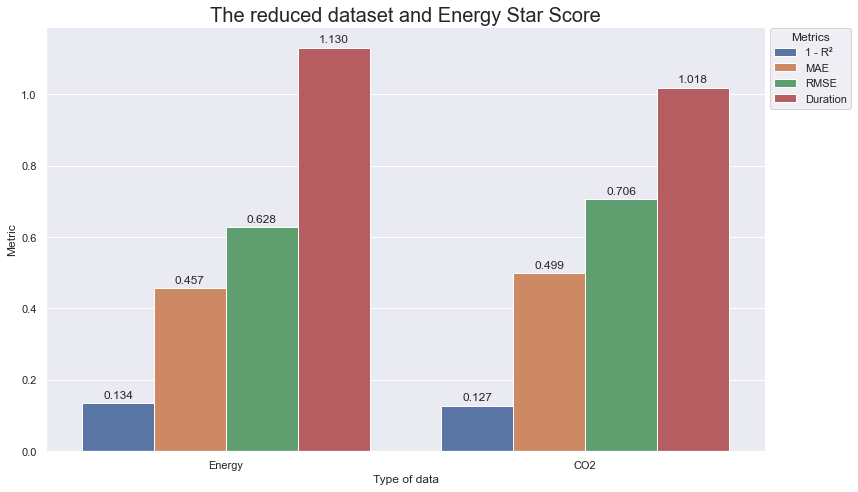

In [309]:
fig, ax1 = plt.subplots(figsize=(12, 7))
plot = sns.barplot(x="Target", y="Value", hue="Metric", data=df_final_reduced_energystarscore, ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".3f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 8), textcoords="offset points")
plt.title("The reduced dataset and Energy Star Score", size=20)
plt.legend(bbox_to_anchor=(1.12, 1), borderaxespad=0, title="Metrics")
plt.tight_layout()
plt.xlabel("Type of data", size=12)
plt.ylabel("Metric", size=12)
plt.savefig("img/EnergyStarScore-reduced-dataset.png")
sns.despine(fig)

<div class="alert alert-block alert-info">
    Here, we can conclude that the importance of the Energy Star Score in the model
</div>